# Data Preparation

## 1. Import Pustaka yang Dibutuhkan

In [2]:
# EDA & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Merge Dataset
from functools import reduce

# Resampling
from imblearn.combine import SMOTEENN
from collections import Counter

# Standarization
from sklearn.preprocessing import MinMaxScaler

# Splitting, Algorithms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Feature importance
from eli5.sklearn import PermutationImportance

## 2. Import Dataset

In [3]:
# Demographics Data
demo_DE = pd.read_csv('Demographics Data/DEMO_L.csv', na_values=' ')
# Examination Data
bp_E = pd.read_csv('Examination Data/BPXO_L.csv', na_values=' ')
body_E = pd.read_csv('Examination Data/BMX_L.csv', na_values=' ')
# Laboratory Data
glyco_L = pd.read_csv('Laboratory Data/GHB_L.csv', na_values=' ')
tchol_L = pd.read_csv('Laboratory Data/TCHOL_L.csv', na_values=' ')
# Questionnaire Data
alcohol_Q = pd.read_csv('Questionnaire Data/ALQ_L.csv', na_values=' ')
bpcl_Q = pd.read_csv('Questionnaire Data/BPQ_L.csv', na_values=' ')
diabetes_Q = pd.read_csv('Questionnaire Data/DIQ_L.csv', na_values=' ')
depress_Q = pd.read_csv('Questionnaire Data/DPQ_L.csv', na_values=' ')
medic_Q= pd.read_csv('Questionnaire Data/MCQ_L.csv', na_values=' ')
smoke_Q = pd.read_csv('Questionnaire Data/SMQ_L.csv', na_values=' ')

## 3. Gabung Dataset

In [4]:
df_list =[
    demo_DE, bp_E, body_E, glyco_L, tchol_L, alcohol_Q, 
    bpcl_Q, diabetes_Q, depress_Q, medic_Q, smoke_Q
]
final_df = reduce(lambda df1, df2: pd.merge(df1, df2, on='SEQN', how='outer'), df_list)

In [5]:
final_df.shape

(11933, 137)

## 3. Saring Fitur yang Akan Digunakan

Terdapat 5 kelompok data yaitu Demographics Data, Examination Data, Laboratory Data, Questionnaire Data. Setiap kelompok data memiliki berbagai jenis dataset yang berhubungan berdasarkan kelompok terkait, kecuali Demographics Data yang hanya memiliki satu dataset. Dataset-dataset yang berada dalam kelompok tersebut akan dipilih, di dalamnya akan diambil beberapa kolom untuk membentuk dataset baru. Sumber data bisa diakses [disini](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2021-2023). Untuk filter/pemilihan kolom dalam setiap datasetnya dapat dilihat sebagai berikut.

Demographics Data:
- DEMO_L: Demographic Variables and Sample Weights
    - RIAGENDR - Gender
    - RIDAGEYR - Age in years at screening
    - RIDRETH3 - Race/Hispanic origin w/ NH Asian</br>
    
Examination Data:
- BPXO_L: Blood Pressure - Oscillometric Measurements
    - BPXOSY1 - Systolic - 1st oscillometric reading
    - BPXODI1 - Diastolic - 1st oscillometric reading
    - BPXOSY2 - Systolic - 2nd oscillometric reading
    - BPXODI2 - Diastolic - 2nd oscillometric reading
    - BPXOSY3 - Systolic - 3rd oscillometric reading
    - BPXODI3 - Diastolic - 3rd oscillometric reading
- BMX_L: Body Measures
    - BMXBMI - Body Mass Index (kg/m**2)</br>
    
Laboratory Data:
- GHB_L: Glycohemoglobin
    - LBXGH - Glycohemoglobin (%)
- TCHOL_L: Cholesterol - Total
    - LBXTC - Total Cholesterol (mg/dL)</br>
    
Questionnaire Data:
- ALQ_L: Alcohol Use
    - ALQ121 - 'Past 12 mos how often drink alc bev' (alkohol)
- BPQ_L: Blood Pressure & Cholesterol
    - BPQ080 - Doctor told you - high cholesterol level
- DIQ_L: Diabetes
    - DIQ010 - 'Doctor told you have diabetes' (diabetes)
- DPQ_L: Mental Health - Depression Screener
    - DPQ020 - Feeling down, depressed, or hopeless
    - DPQ030 - Trouble sleeping or sleeping too much
    - DPQ050 - Poor appetite or overeating
- MCQ_L: Medical Conditions
    - MCQ160l - Ever told you had any liver condition
    - MCQ160m - Ever told you had thyroid problem
    - MCQ220 - Ever told you had cancer or malignancy
- SMQ_L: Smoking - Cigarette Use
    - SMQ020 - 'Smoked at least 100 cigarettes in life' (merokok_100)

Kategori Faktor Risiko:
- Demografi:
    - Umur
    - Jenis Kelamin
    - Ras

    </br>
- Pemeriksaan Medis:
    - Systolic - 1st oscillometric reading
    - Diastolic - 1st oscillometric reading
    - Systolic - 2nd oscillometric reading
    - Diastolic - 2nd oscillometric reading
    - Systolic - 3rd oscillometric reading
    - Diastolic - 3rd oscillometric reading
    - BMI
    - HbA1c
    - Kadar Kolesterol

    </br>
- Kesehatan Mental:
    - Sedih, Depersi, atau Putus Asa
    - Gangguan Tidur
    - Kelelahan
    - Gannguan Makan

    </br>
- Riwayat Medis:
    - Kolesterol Tinggi
    - Tiroid
    - Liver
    - Kanker

    </br>
- Gaya Hidup:
    - Konsumsi Alkohol
    - Merokok

In [6]:
df = final_df[[
    'SEQN', # fitur identifikasi
    'RIAGENDR','RIDAGEYR','RIDRETH3',
    'BPXOSY1','BPXODI1','BPXOSY2','BPXODI2','BPXOSY3','BPXODI3',
    'BMXBMI',
    'LBXGH',
    'LBXTC',
    'ALQ121',
    'BPQ080',
    'DIQ010',
    'DPQ020','DPQ030','DPQ050',
    'MCQ160L','MCQ160M','MCQ220',
    'SMQ020'
]]

In [7]:
df.shape

(11933, 23)

## 5. Drop Nilai Null

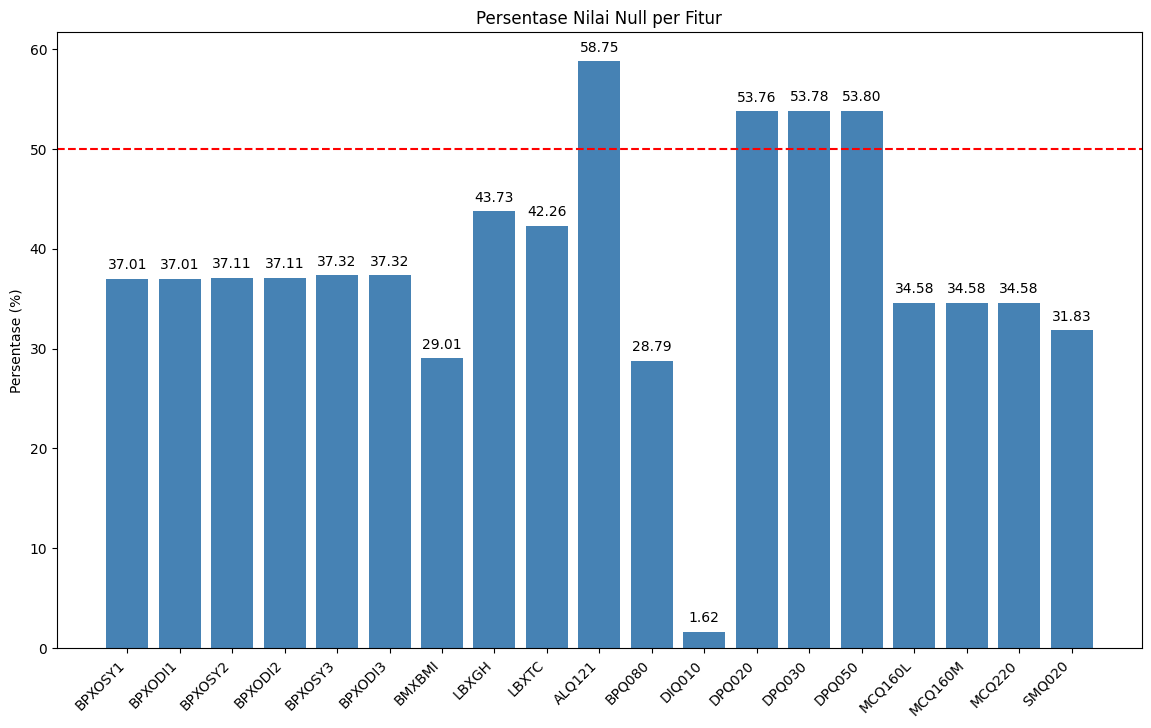

In [8]:
# Hitung jumlah nilai null per fitur
null_counts = df.isnull().sum()

# Hitung persentase null per fitur
null_percent = (null_counts / len(df)) * 100

# Ambil hanya fitur yang memiliki null
null_percent = null_percent[null_percent > 0]

# Plot
plt.figure(figsize=(14, 8))
bars = plt.bar(null_percent.index, null_percent.values, color='steelblue')
# Tambahkan nilai persentase di atas tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f'{height:.2f}', ha='center', fontsize=10)
# Garis horizontal putus-putus di 50%
plt.axhline(y=50, color='red', linestyle='--', linewidth=1.5)
# Label dan tampilan
plt.xticks(rotation=45, ha='right')
plt.ylabel('Persentase (%)')
plt.title('Persentase Nilai Null per Fitur')
plt.show()

In [9]:
df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
RIDRETH3       0
BPXOSY1     4416
BPXODI1     4416
BPXOSY2     4428
BPXODI2     4428
BPXOSY3     4453
BPXODI3     4453
BMXBMI      3462
LBXGH       5218
LBXTC       5043
ALQ121      7011
BPQ080      3435
DIQ010       193
DPQ020      6415
DPQ030      6417
DPQ050      6420
MCQ160L     4126
MCQ160M     4127
MCQ220      4126
SMQ020      3798
dtype: int64

In [10]:
df = df.dropna(ignore_index=True)

In [11]:
df.shape

(4268, 23)

## 6. Drop Fitur Identifikasi (SEQN)

In [12]:
df = df.drop(columns='SEQN', axis=1)

## 7. Menetapkan Tipe Data Fitur

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  4268 non-null   float64
 1   RIDAGEYR  4268 non-null   float64
 2   RIDRETH3  4268 non-null   float64
 3   BPXOSY1   4268 non-null   float64
 4   BPXODI1   4268 non-null   float64
 5   BPXOSY2   4268 non-null   float64
 6   BPXODI2   4268 non-null   float64
 7   BPXOSY3   4268 non-null   float64
 8   BPXODI3   4268 non-null   float64
 9   BMXBMI    4268 non-null   float64
 10  LBXGH     4268 non-null   float64
 11  LBXTC     4268 non-null   float64
 12  ALQ121    4268 non-null   float64
 13  BPQ080    4268 non-null   float64
 14  DIQ010    4268 non-null   float64
 15  DPQ020    4268 non-null   float64
 16  DPQ030    4268 non-null   float64
 17  DPQ050    4268 non-null   float64
 18  MCQ160L   4268 non-null   float64
 19  MCQ160M   4268 non-null   float64
 20  MCQ220    4268 non-null   floa

In [14]:
# Demographic Variables and Sample Weights
df['RIAGENDR'] = df['RIAGENDR'].astype('int64').astype('category')
df['RIDAGEYR'] = df['RIDAGEYR'].astype('int64')
df['RIDRETH3'] = df['RIDRETH3'].astype('int64').astype('category')
# Blood Pressure - Oscillometric Measurements
df['BPXOSY1'] = df['BPXOSY1'].astype('int64')
df['BPXODI1'] = df['BPXODI1'].astype('int64')
df['BPXOSY2'] = df['BPXOSY2'].astype('int64')
df['BPXODI2'] = df['BPXODI2'].astype('int64')
df['BPXOSY3'] = df['BPXOSY3'].astype('int64')
df['BPXODI3'] = df['BPXODI3'].astype('int64')
# Body Measures
df['BMXBMI'] = df['BMXBMI'].astype('float64')
# Glycohemoglobin
df['LBXGH'] = df['LBXGH'].astype('float64')
# Cholesterol – Total
df['LBXTC'] = df['LBXTC'].astype('int64')
# Alcohol Use
df['ALQ121'] = df['ALQ121'].astype('int64').astype('category')
# Blood Pressure & Cholesterol
df['BPQ080'] = df['BPQ080'].astype('int64').astype('category')
# Diabetes
df['DIQ010'] = df['DIQ010'].astype('int64').astype('category')
# Mental Health - Depression Screener
df['DPQ020'] = df['DPQ020'].astype('int64').astype('category')
df['DPQ030'] = df['DPQ030'].astype('int64').astype('category')
df['DPQ050'] = df['DPQ050'].astype('int64').astype('category')
# Medical Conditions
df['MCQ160L'] = df['MCQ160L'].astype('int64').astype('category')
df['MCQ160M'] = df['MCQ160M'].astype('int64').astype('category')
df['MCQ220'] = df['MCQ220'].astype('int64').astype('category')
# Smoking - Cigarette Use
df['SMQ020'] = df['SMQ020'].astype('int64').astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RIAGENDR  4268 non-null   category
 1   RIDAGEYR  4268 non-null   int64   
 2   RIDRETH3  4268 non-null   category
 3   BPXOSY1   4268 non-null   int64   
 4   BPXODI1   4268 non-null   int64   
 5   BPXOSY2   4268 non-null   int64   
 6   BPXODI2   4268 non-null   int64   
 7   BPXOSY3   4268 non-null   int64   
 8   BPXODI3   4268 non-null   int64   
 9   BMXBMI    4268 non-null   float64 
 10  LBXGH     4268 non-null   float64 
 11  LBXTC     4268 non-null   int64   
 12  ALQ121    4268 non-null   category
 13  BPQ080    4268 non-null   category
 14  DIQ010    4268 non-null   category
 15  DPQ020    4268 non-null   category
 16  DPQ030    4268 non-null   category
 17  DPQ050    4268 non-null   category
 18  MCQ160L   4268 non-null   category
 19  MCQ160M   4268 non-null   category
 20  MCQ220  

## 8. Mengubah Nama Fitur

In [16]:
df = df.rename(columns={
    # Data Demografi
    'RIAGENDR':'gender','RIDAGEYR':'usia','RIDRETH3':'ras',
    # Pemeriksaan Medis
    'BPXOSY1':'sistolik1','BPXOSY2':'sistolik2','BPXOSY3':'sistolik3',
    'BPXODI1':'diastolik1','BPXODI2':'diastolik2','BPXODI3':'diastolik3',
    'BMXBMI':'BMI', 'LBXGH':'HbA1c', 'LBXTC':'kadar_kolesterol', 
    # Riwayat Kesehatan
    'BPQ080':'riw_kolesterol_tinggi', 'MCQ160L':'riw_liver',
    'MCQ160M':'riw_tiroid','MCQ220':'riw_kanker',
    # Kesehatan Mental
    'DPQ020':'sedih-depresi-putus_asa','DPQ030':'gangguan_tidur','DPQ050':'gangguan_makan',
    # Gaya Hidup
    'ALQ121':'alkohol','SMQ020':'merokok100',
    # Target
    'DIQ010':'diabetes'
})

In [17]:
df.head()

gender  usia ras  sistolik1  diastolik1  sistolik2  diastolik2  sistolik3  \
0      1    66   3        121          84        117          76        113   
1      2    44   2        111          79        112          80        104   
2      1    34   1        110          72        120          74        115   
3      2    68   3        143          76        136          74        145   
4      2    74   3        154          76        167          70        154   

   diastolik3   BMI  ...  alkohol  riw_kolesterol_tinggi diabetes  \
0          76  33.5  ...        2                      2        2   
1          76  29.7  ...       10                      1        1   
2          75  30.2  ...        4                      2        2   
3          78  42.6  ...        0                      1        2   
4          68  43.0  ...        8                      2        2   

  sedih-depresi-putus_asa gangguan_tidur gangguan_makan riw_liver riw_tiroid  \
0                       0              1              0         2          2   
1                       0              1              0         2          1   
2                       0              0              0         2          2   
3                       0              0              0         2          2   
4                       0              0              0         2          1   

  riw_kanker merokok100  
0          1          1  
1          2          2  
2          2          1  
3          1          2  
4          1          2  

[5 rows x 22 columns]

In [18]:
df.iloc[:10,:11]

gender  usia ras  sistolik1  diastolik1  sistolik2  diastolik2  sistolik3  \
0      1    66   3        121          84        117          76        113   
1      2    44   2        111          79        112          80        104   
2      1    34   1        110          72        120          74        115   
3      2    68   3        143          76        136          74        145   
4      2    74   3        154          76        167          70        154   
5      1    39   3        139          94        136          91        133   
6      1    51   3         99          69        110          68        123   
7      2    56   3        122          79        128          81        120   
8      1    47   1        107          67        115          75        115   
9      1    68   3        116          71        117          71        127   

   diastolik3   BMI  HbA1c  
0          76  33.5    5.6  
1          76  29.7    6.2  
2          75  30.2    5.1  
3          78  42.6    5.9  
4          68  43.0    5.6  
5          94  46.1    5.3  
6          67  24.4    4.8  
7          82  27.3    5.0  
8          68  28.7    5.8  
9          69  22.7    5.7

In [19]:
(df.iloc[:10,11:])

kadar_kolesterol alkohol riw_kolesterol_tinggi diabetes  \
0               214       2                     2        2   
1               187      10                     1        1   
2               183       4                     2        2   
3               203       0                     1        2   
4               191       8                     2        2   
5               179       3                     2        2   
6               183       6                     2        2   
7               214       3                     2        2   
8               189       3                     2        2   
9               193       3                     1        2   

  sedih-depresi-putus_asa gangguan_tidur gangguan_makan riw_liver riw_tiroid  \
0                       0              1              0         2          2   
1                       0              1              0         2          1   
2                       0              0              0         2          2   
3                       0              0              0         2          2   
4                       0              0              0         2          1   
5                       0              0              1         2          2   
6                       0              0              0         2          2   
7                       1              1              1         2          2   
8                       0              0              0         2          2   
9                       0              0              0         2          1   

  riw_kanker merokok100  
0          1          1  
1          2          2  
2          2          1  
3          1          2  
4          1          2  
5          2          2  
6          2          2  
7          2          1  
8          2          2  
9          2          2

# Exploratory Data Analysis

In [20]:
num_cols = ['usia', 'sistolik1', 'diastolik1', 'sistolik2', 'diastolik2', 'sistolik3', 'diastolik3', 'BMI', 'HbA1c', 'kadar_kolesterol']

In [21]:
len(num_cols)

10

In [22]:
cat_cols = ['gender', 'ras', 'alkohol','sedih-depresi-putus_asa','gangguan_tidur', 'gangguan_makan', 'riw_liver', 'riw_tiroid', 'riw_kanker','riw_kolesterol_tinggi', 'merokok100']

In [23]:
len(cat_cols)

11

In [24]:
all_cols = num_cols + cat_cols

## 1. Statistik Deskriptif

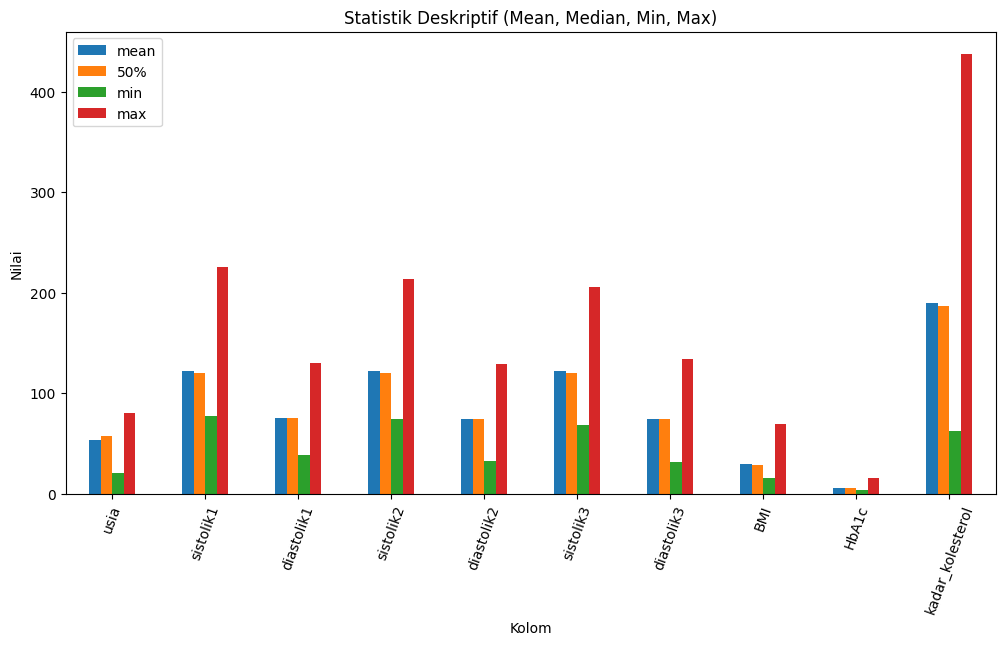

In [25]:
stats = df[num_cols].describe().loc[['mean', '50%', 'min', 'max']]
stats.T.plot(kind='bar', figsize=(12, 6))
plt.title('Statistik Deskriptif (Mean, Median, Min, Max)')
plt.ylabel('Nilai')
plt.xlabel('Kolom')
plt.xticks(rotation=70)
plt.legend(loc='upper left')
plt.show()

## 2. Fitur Numerik

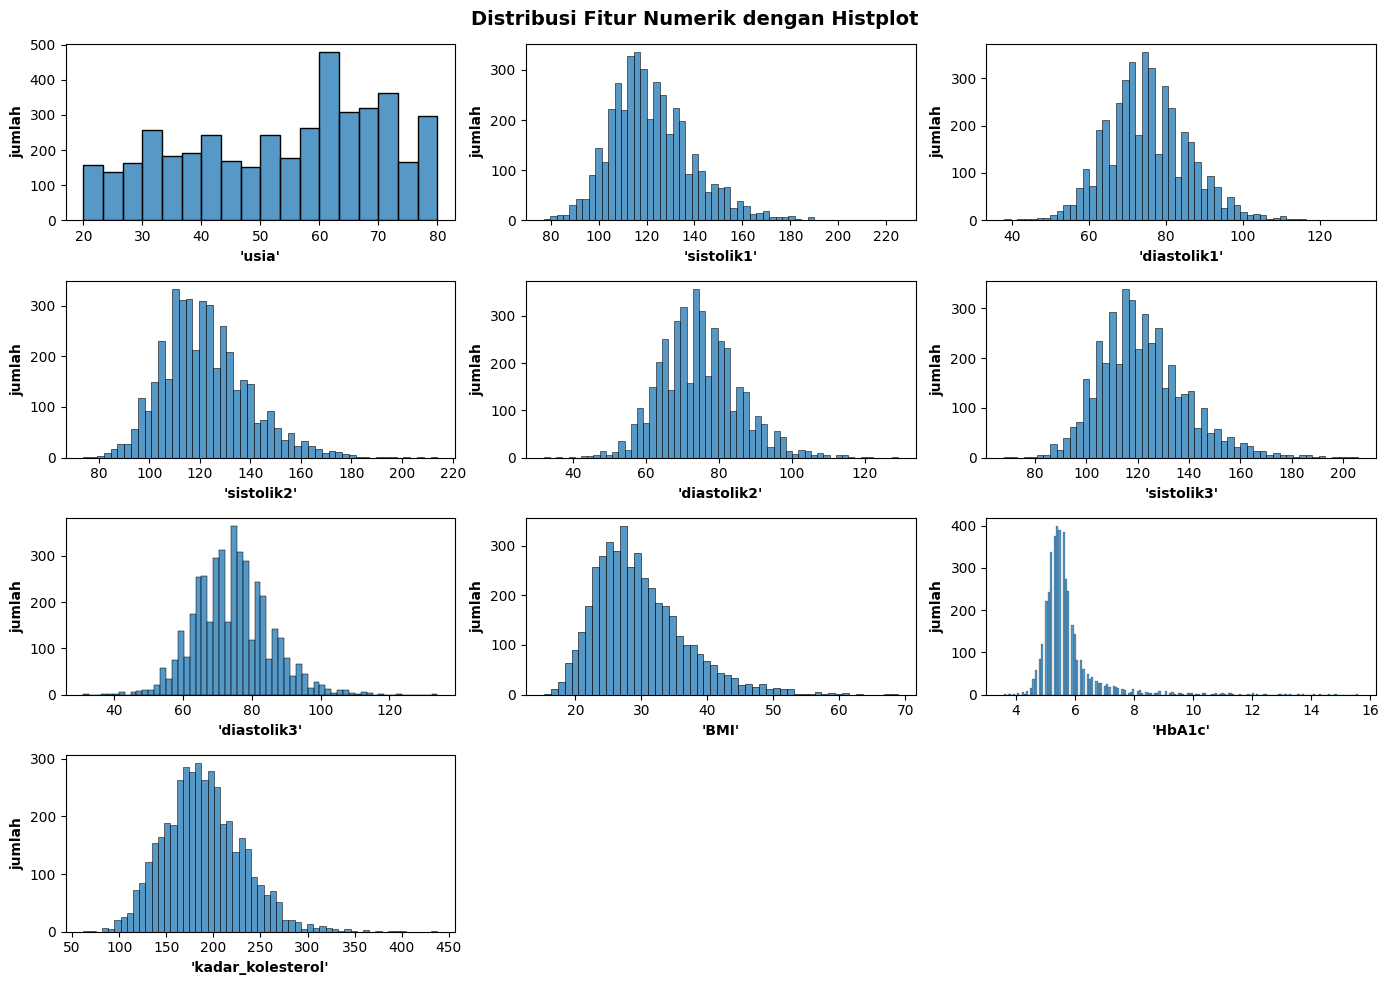

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(14, 10))
ax = ax.flatten()
plt.suptitle("Distribusi Fitur Numerik dengan Histplot", fontsize=14, fontweight='bold')

for col, index in zip(num_cols, range(len(num_cols))):
    sns.histplot(ax=ax[num_cols.index(col)], x=col, data=df, log_scale=False)
    ax[num_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[num_cols.index(col)].set_ylabel("jumlah", fontsize=10, fontweight='bold')
    # ax[num_cols.index(col)].set_yticks()

ax[len(num_cols)].set_axis_off()
ax[len(num_cols)+1].set_axis_off()
plt.tight_layout()
plt.show()

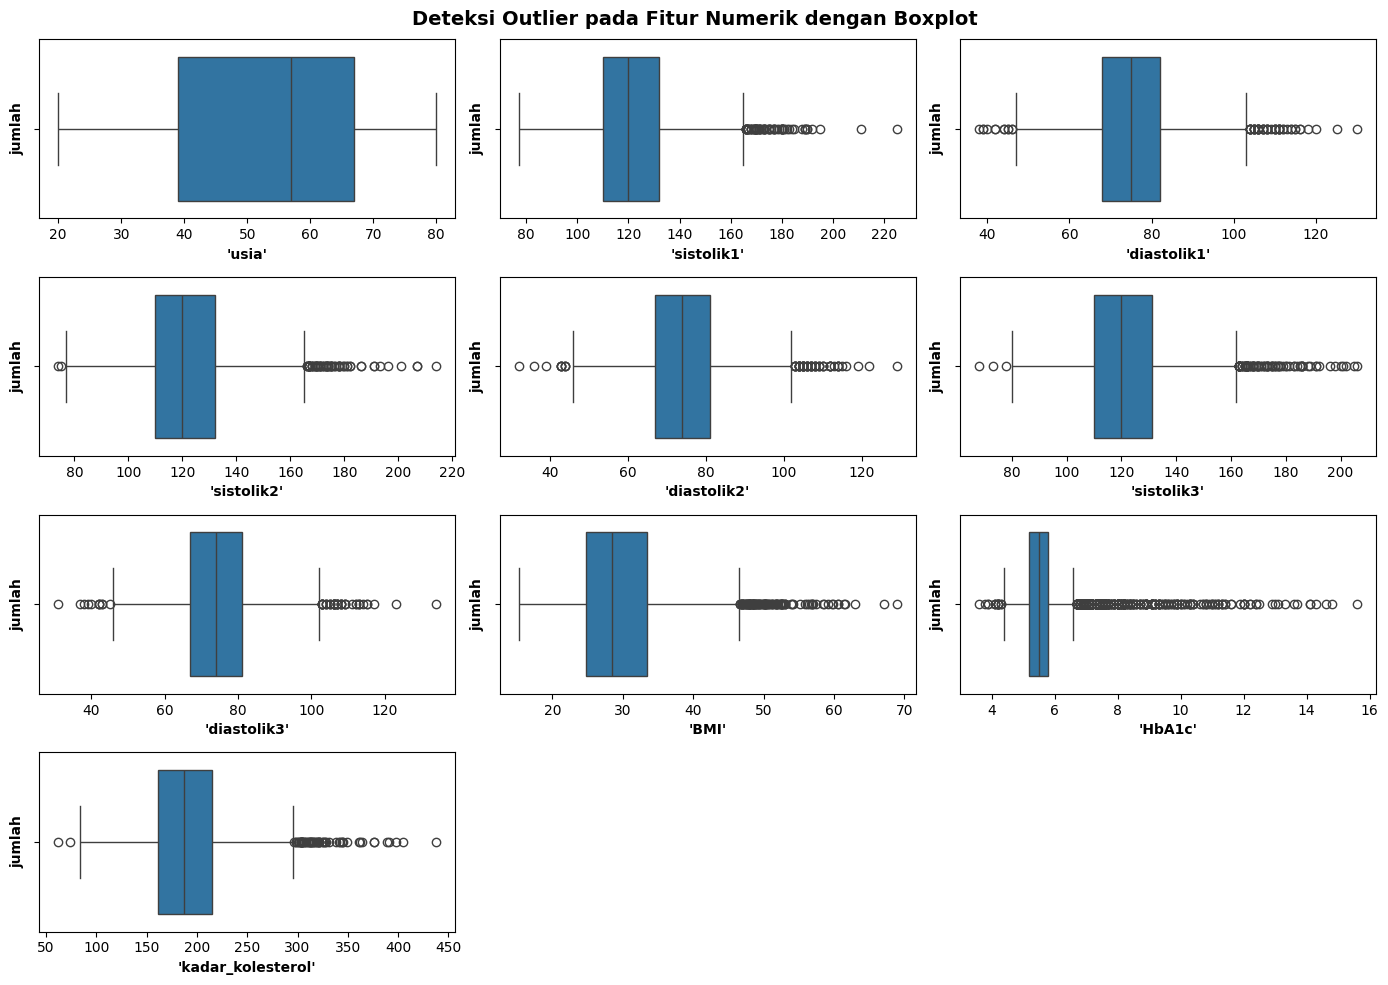

In [27]:
fig, ax = plt.subplots(4, 3, figsize=(14, 10))
ax = ax.flatten()
plt.suptitle("Deteksi Outlier pada Fitur Numerik dengan Boxplot", fontsize=14, fontweight='bold')

for col, index in zip(num_cols, range(len(num_cols))):
    sns.boxplot(ax=ax[num_cols.index(col)], x=col, data=df)
    ax[num_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[num_cols.index(col)].set_ylabel("jumlah", fontsize=10, fontweight='bold')

ax[len(num_cols)].set_axis_off()
ax[len(num_cols)+1].set_axis_off()
plt.tight_layout()
plt.show()

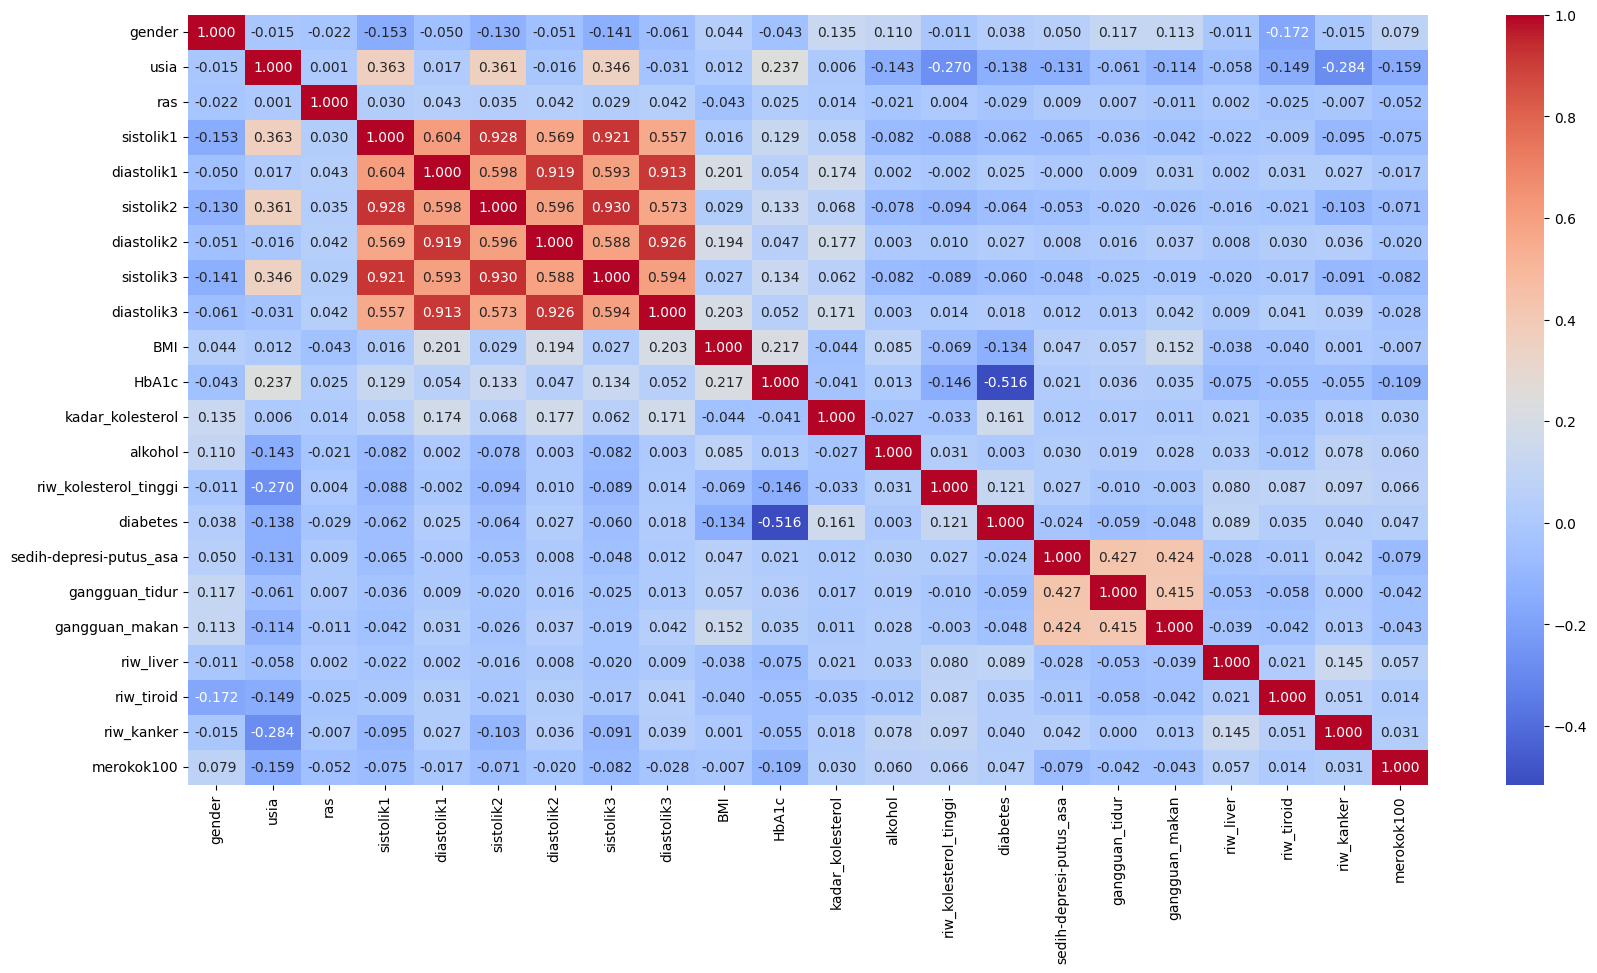

In [28]:
plt.figure(figsize=(20, 10))
# Hitung korelasi
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
plt.xticks(rotation=90)
plt.savefig('heatmap_korelasi.png', bbox_inches='tight')
plt.show()

## 3. Fitur Katagorikal

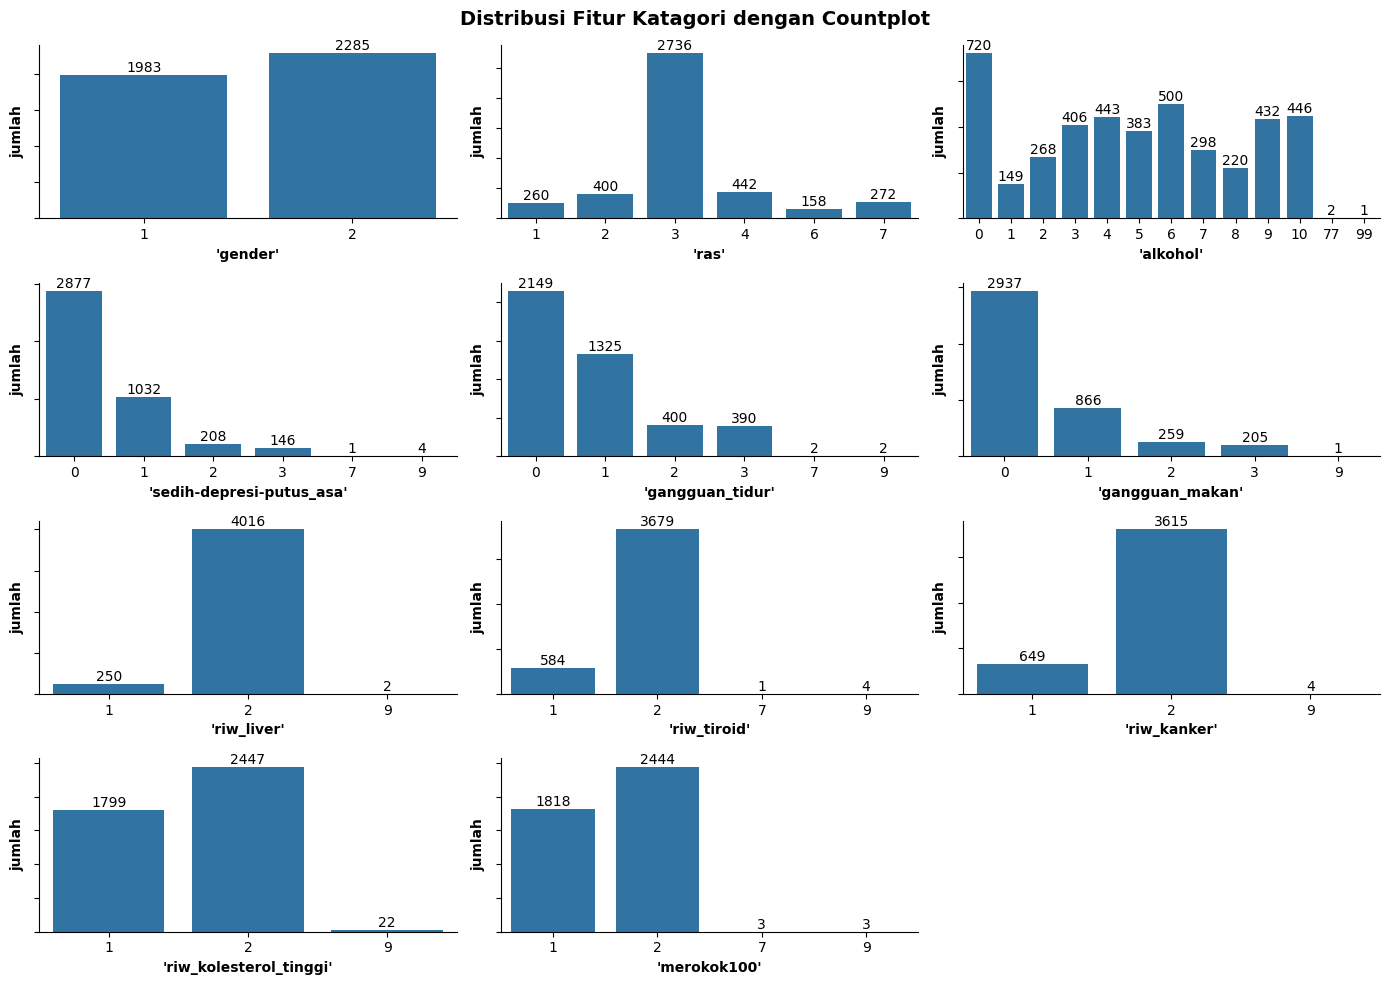

In [29]:
fig, ax = plt.subplots(4, 3, figsize=(14, 10))
ax = ax.flatten()
plt.suptitle("Distribusi Fitur Katagori dengan Countplot", fontsize=14, fontweight='bold')

for col, index in zip(cat_cols, range(len(cat_cols))):
    sns.countplot(ax=ax[cat_cols.index(col)], x=col, data=df)
    ax[cat_cols.index(col)].set_ylabel("jumlah", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].bar_label(ax[cat_cols.index(col)].containers[0])
    ax[cat_cols.index(col)].spines['right'].set_visible(False)
    ax[cat_cols.index(col)].spines['top'].set_visible(False)
    ax[cat_cols.index(col)].set_yticklabels([])
# ax[len(num_cols)].set_axis_off()
ax[len(num_cols)+1].set_axis_off()
plt.tight_layout()
plt.show()

## 4. Korelasi Fitur

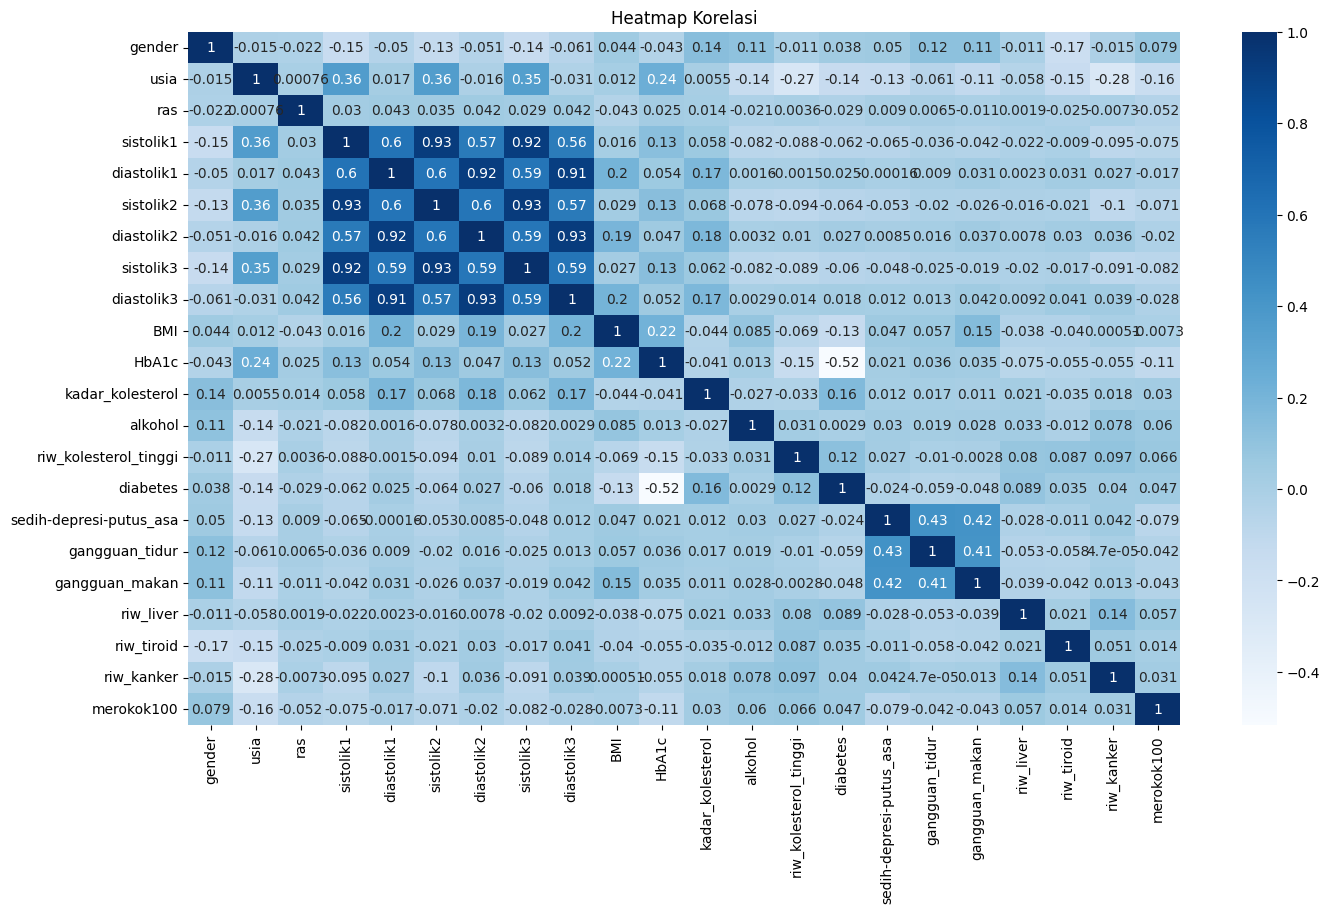

In [30]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Heatmap Korelasi')
plt.xticks(rotation=90)
plt.show()

## 5. Data Target

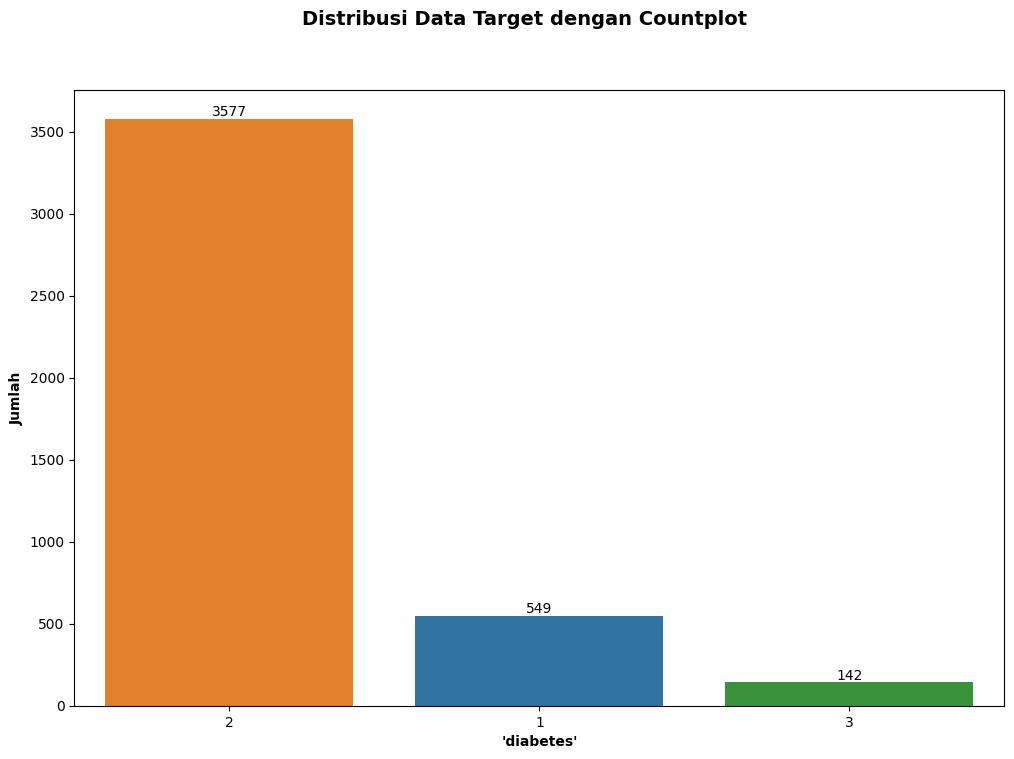

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.suptitle("Distribusi Data Target dengan Countplot", fontsize=14, fontweight='bold')

sns.countplot(data=df, x='diabetes', hue='diabetes', order=df['diabetes'].value_counts().index, legend=False)
ax.set_xlabel("'diabetes'", fontsize=10, fontweight='bold')
ax.set_ylabel("Jumlah", fontsize=10, fontweight='bold')
for i in range(len(df['diabetes'].value_counts())):
    ax.bar_label(ax.containers[i-1])
ax.set_xticks(range(len(df['diabetes'].value_counts())))
plt.show()

# Data Preprocessing

## 1. Drop Respon Tidak Pasti

Drop respon yang tidak pasti
- Kolom `alkohol` yang bernilai 99 artinya responden menjawab tidak tahu, 77 artinya reponden menolak menjawab
- Kolom `sedih/depresi/putus_asa` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `gangguan_tidur` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `gangguan_makan` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `tiroid` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `kanker` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `merokok100` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `akt_fisik` yang bernilai 7777 artinya responden menolak menjawab, 9999 artinya responden menjawab tidak tahu
- Kolom `riw_darah_tinggi` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `riw_kolesterol_tinggi` yang bernilai 7 artinya responden menolak menjawab, 9 artinya responden menjawab tidak tahu
- Kolom `diabetes` yang bernilai 3 artinya responden prediabetes, sedangkan prediksi hanya akan menentukan positif atau negatif saja

In [32]:
print(f"Dimensi dataset sebelum di drop{df.shape}")

Dimensi dataset sebelum di drop(4268, 22)


In [33]:
columns_to_filter = {
    # katagori
    'diabetes': [3],
    'alkohol': [99, 77],
    'sedih-depresi-putus_asa': [9, 7],
    'gangguan_tidur': [9, 7],
    'gangguan_makan': [9, 7],
    'riw_liver': [9, 7],
    'riw_tiroid': [9, 7],
    'riw_kanker': [9, 7],
    'riw_kolesterol_tinggi': [9, 7],
    'merokok100': [9, 7]
}
for col, values in columns_to_filter.items():
    if pd.api.types.is_numeric_dtype(df[col]):
        df = df.loc[~df[col].isin(values)].reset_index(drop=True)
    else:
        df = df.loc[~df[col].isin(values)].reset_index(drop=True)
        df[col] = df[col].cat.remove_unused_categories()

In [34]:
print(f"Dimensi dataset setelah di drop{df.shape}")

Dimensi dataset setelah di drop(4080, 22)


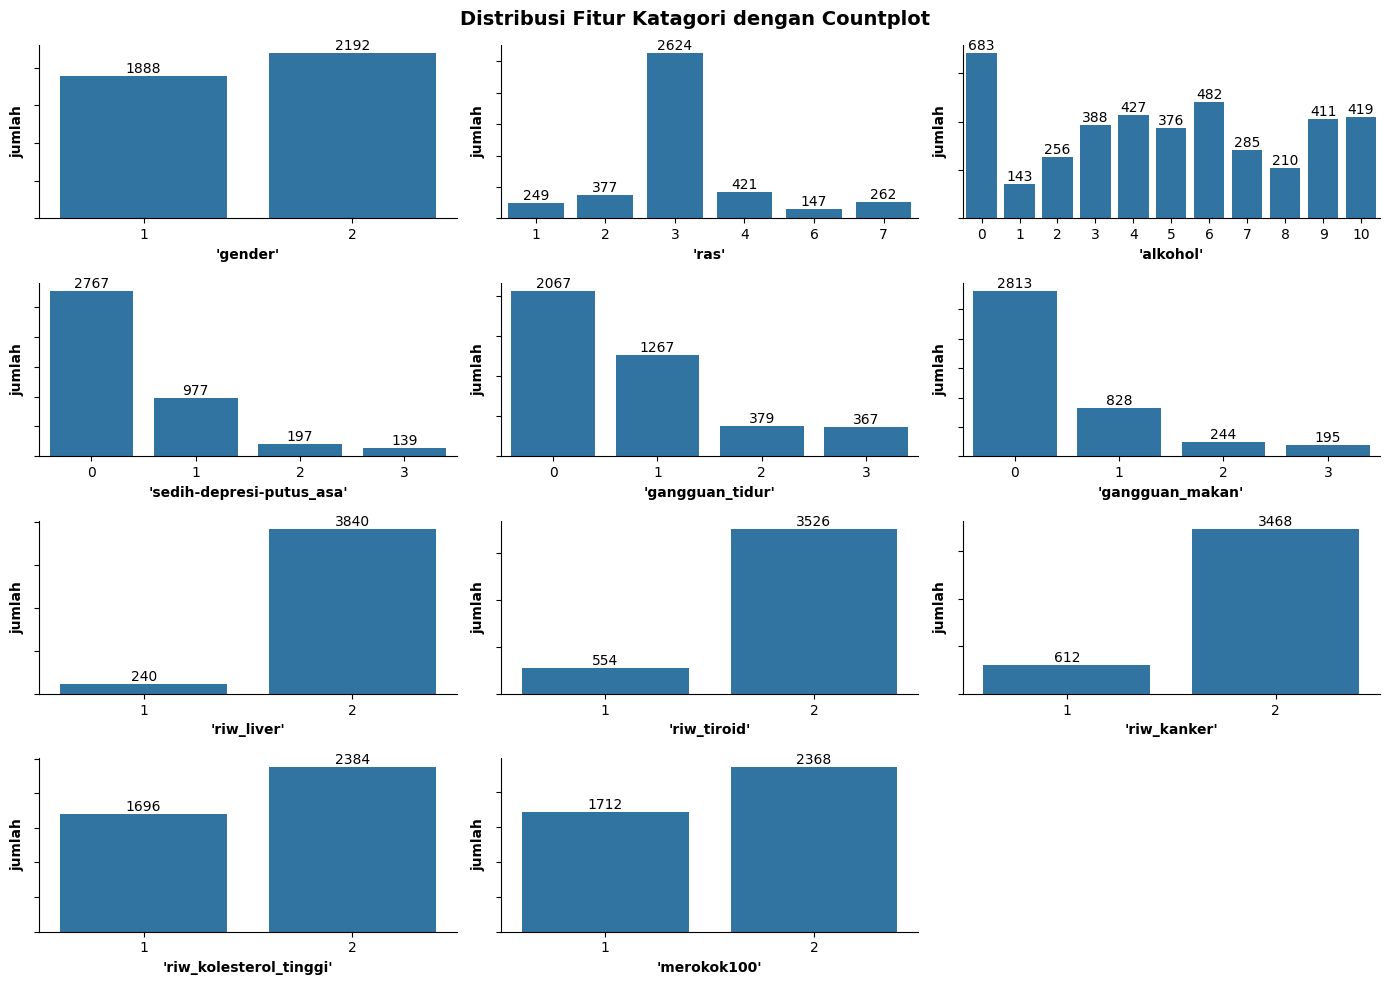

In [35]:
fig, ax = plt.subplots(4, 3, figsize=(14, 10))
ax = ax.flatten()
plt.suptitle("Distribusi Fitur Katagori dengan Countplot", fontsize=14, fontweight='bold')

for col, index in zip(cat_cols, range(len(cat_cols))):
    sns.countplot(ax=ax[cat_cols.index(col)], x=col, data=df)
    ax[cat_cols.index(col)].set_ylabel("jumlah", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].bar_label(ax[cat_cols.index(col)].containers[0])
    ax[cat_cols.index(col)].spines['right'].set_visible(False)
    ax[cat_cols.index(col)].spines['top'].set_visible(False)
    ax[cat_cols.index(col)].set_yticklabels([])
# ax[len(num_cols)].set_axis_off()
ax[len(num_cols)+1].set_axis_off()
plt.tight_layout()
plt.show()

## 2. Drop Outlier

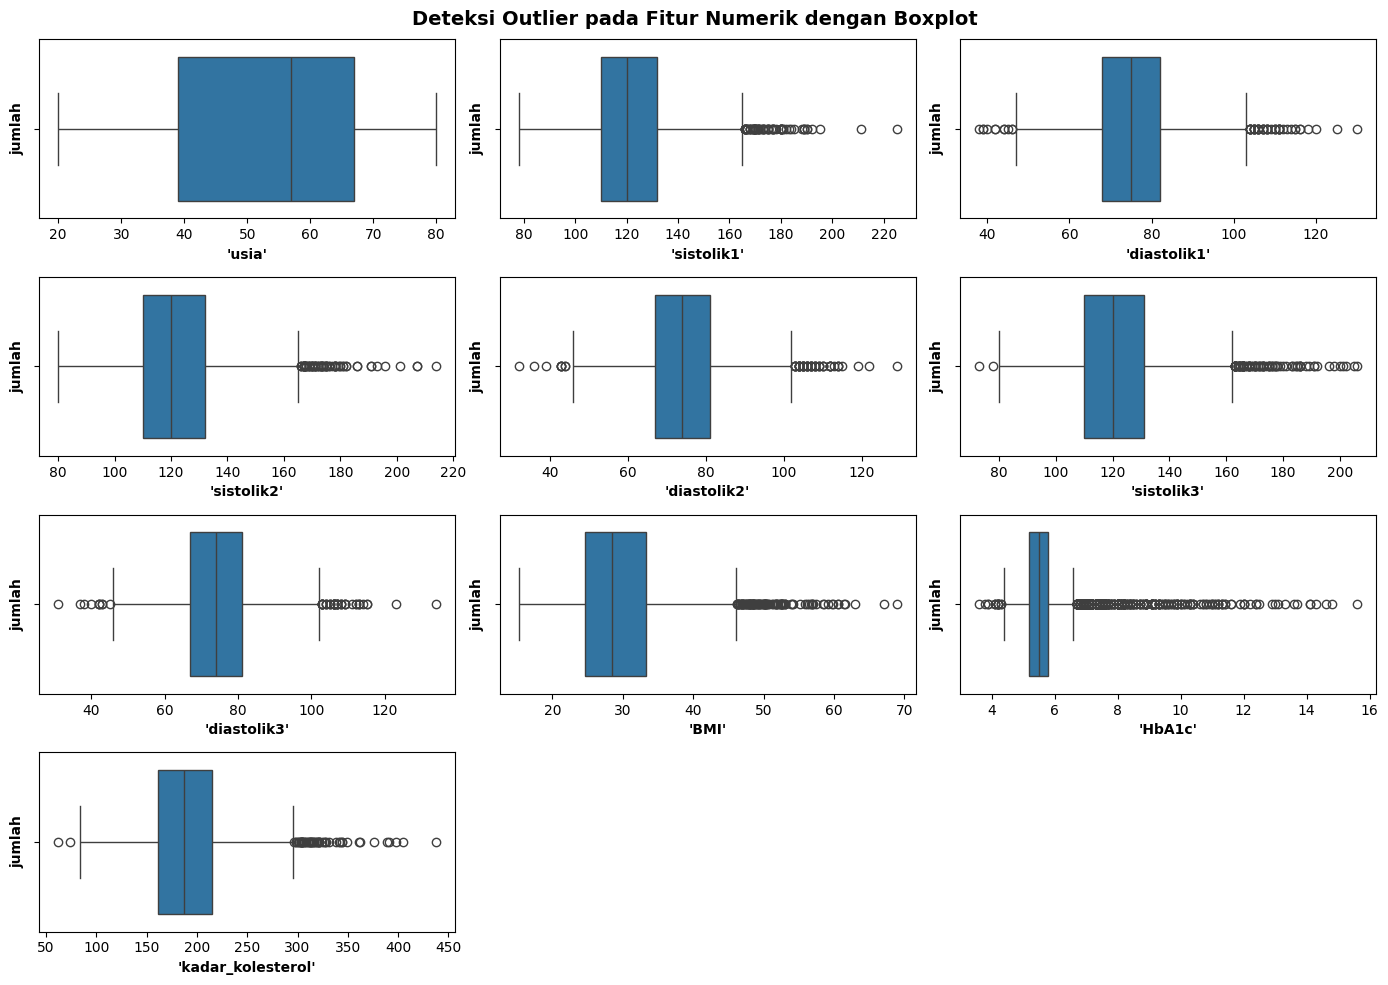

In [36]:
fig, ax = plt.subplots(4, 3, figsize=(14, 10))
ax = ax.flatten()
plt.suptitle("Deteksi Outlier pada Fitur Numerik dengan Boxplot", fontsize=14, fontweight='bold')

for col, index in zip(num_cols, range(len(num_cols))):
    sns.boxplot(ax=ax[num_cols.index(col)], x=col, data=df)
    ax[num_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[num_cols.index(col)].set_ylabel("jumlah", fontsize=10, fontweight='bold')

ax[len(num_cols)].set_axis_off()
ax[len(num_cols)+1].set_axis_off()
plt.tight_layout()
plt.show()

## 3. Rekayasa Fitur

### 3.1 Memperbaiki Nilai pada Fitur Usia

- Terdapat kolom unik yaitu kolom `usia` yang memiliki tipe data campuran (numerik untuk umur 0 sampai 79, dan katagori untuk nilai 80 ke atas) sehingga perlu perlakuan khusus dengan mengubah kolom `usia` menjadi katagori.

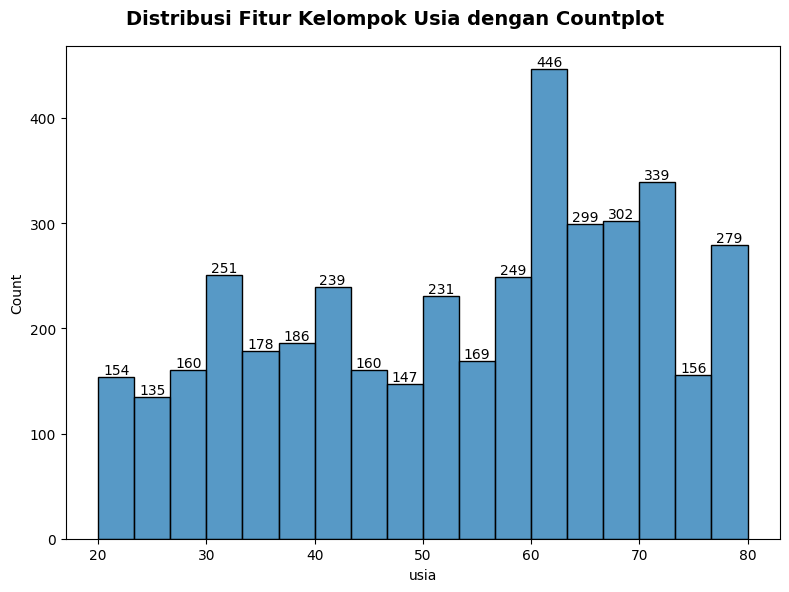

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.suptitle("Distribusi Fitur Kelompok Usia dengan Countplot", fontsize=14, fontweight='bold')
sns.histplot(x='usia', data=df)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [38]:
df['usia'] = df['usia'].replace(80, 85)

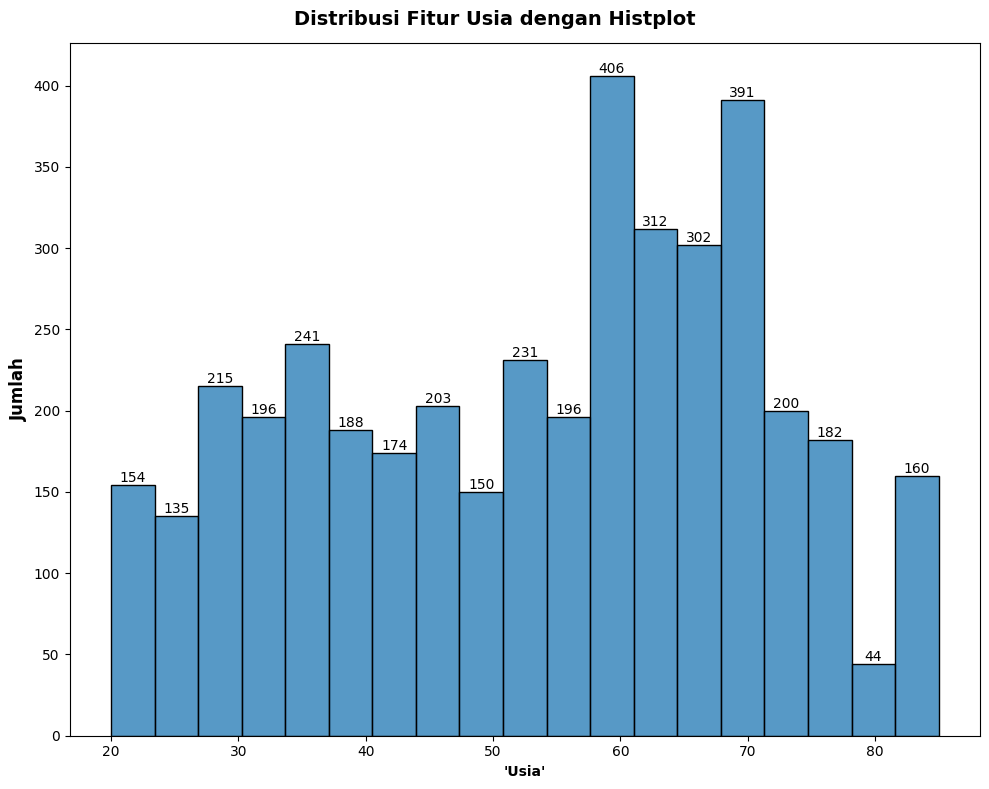

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.suptitle("Distribusi Fitur Usia dengan Histplot", fontsize=14, fontweight='bold')
sns.histplot(x='usia', data=df)
ax.set_xlabel("'Usia'", fontsize=10, fontweight='bold')
ax.set_ylabel("Jumlah", fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### 3.2 Membuat Fitur Tekanan Darah

**Mean Arterial Pressure**</br>
MAP dapat dihitung menggunakan rumus berikut:</br>
Diastolik + 1/3 (Sistolik - Diastolik)

In [40]:
rata2_sistolik = (df['sistolik1'] + df['sistolik2'] + df['sistolik3'])/3
rata2_diastolik = (df['diastolik1'] + df['diastolik2'] + df['diastolik3'])/3
df['tekanan_darah'] = rata2_diastolik + (rata2_sistolik - rata2_diastolik)/3
df['tekanan_darah'] = df['tekanan_darah'].round().astype('int64')

In [41]:
# drop kolom sistolik dan daistolik
df = df.drop(columns=['sistolik1', 'sistolik2', 'sistolik3', 'diastolik1', 'diastolik2', 'diastolik3'])

In [42]:
df.shape

(4080, 17)

### 3.3 Memperbaiki Urutan Katagori Fitur Alkohol

In [43]:
alkohol_mapping = {
    0: 0, 10: 1, 9: 2, 8: 3, 7: 4,
    6: 5, 5: 6, 4: 7, 3: 8, 2: 9, 1: 10,
}
df['alkohol'] = df['alkohol'].map(alkohol_mapping)

## 4. Encoding

In [44]:
# df = df.apply(LabelEncoder().fit_transform)

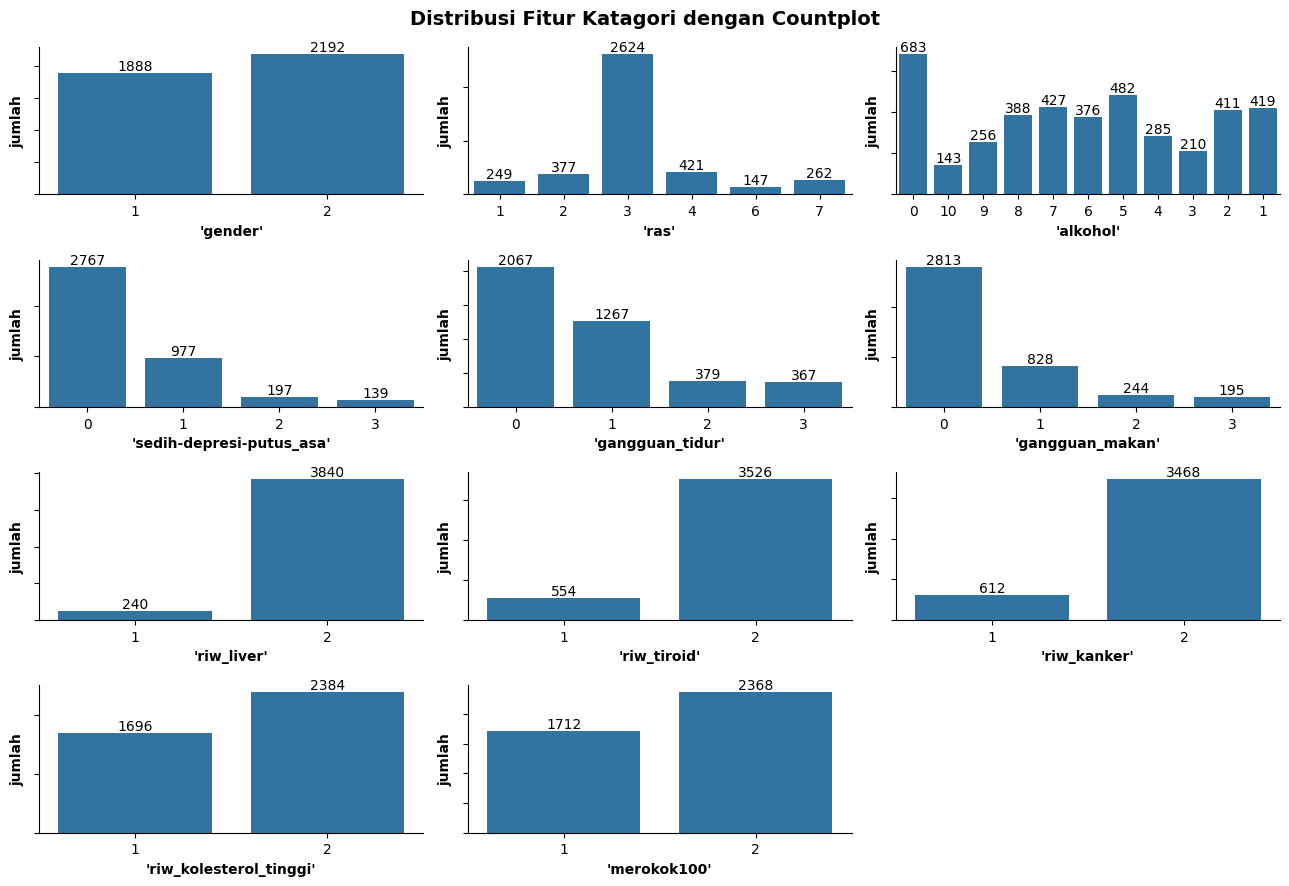

In [45]:
fig, ax = plt.subplots(4, 3, figsize=(13, 9))
ax = ax.flatten()
plt.suptitle("Distribusi Fitur Katagori dengan Countplot", fontsize=14, fontweight='bold')

for col, index in zip(cat_cols, range(len(cat_cols))):
    sns.countplot(ax=ax[cat_cols.index(col)], x=col, data=df)
    ax[cat_cols.index(col)].set_ylabel("jumlah", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].bar_label(ax[cat_cols.index(col)].containers[0])
    ax[cat_cols.index(col)].spines['right'].set_visible(False)
    ax[cat_cols.index(col)].spines['top'].set_visible(False)
    ax[cat_cols.index(col)].set_yticklabels([])
# ax[len(num_cols)].set_axis_off()
ax[len(num_cols)+1].set_axis_off()
plt.tight_layout()
plt.show()

- Biner

In [46]:
bin_cols = ['gender', 'riw_liver', 'riw_tiroid', 'riw_kanker', 'riw_kolesterol_tinggi', 'merokok100', 'diabetes']
for col in bin_cols:
    df[col] = df[col].cat.rename_categories({2:0})

---

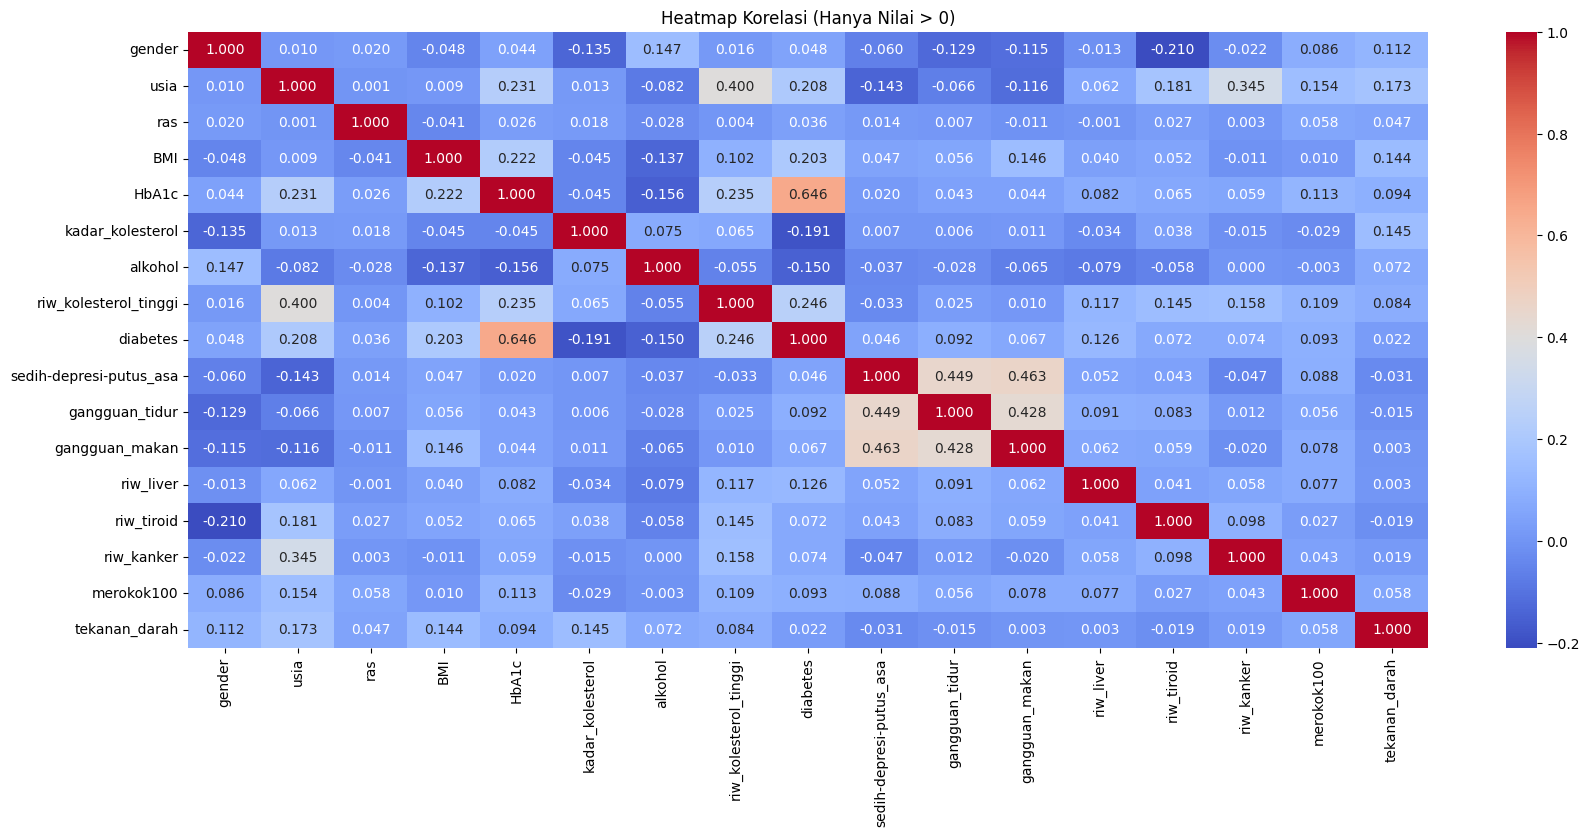

In [47]:
plt.figure(figsize=(20, 8))
# Hitung korelasi
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
plt.title('Heatmap Korelasi (Hanya Nilai > 0)')
plt.xticks(rotation=90)
plt.show()

---

- Nominal

In [48]:
df = pd.get_dummies(df, columns=['ras'], prefix='ras', drop_first=True)
df[['ras_2', 'ras_3', 'ras_4', 'ras_6', 'ras_7']] = df[['ras_2', 'ras_3', 'ras_4', 'ras_6', 'ras_7']].astype('int64')

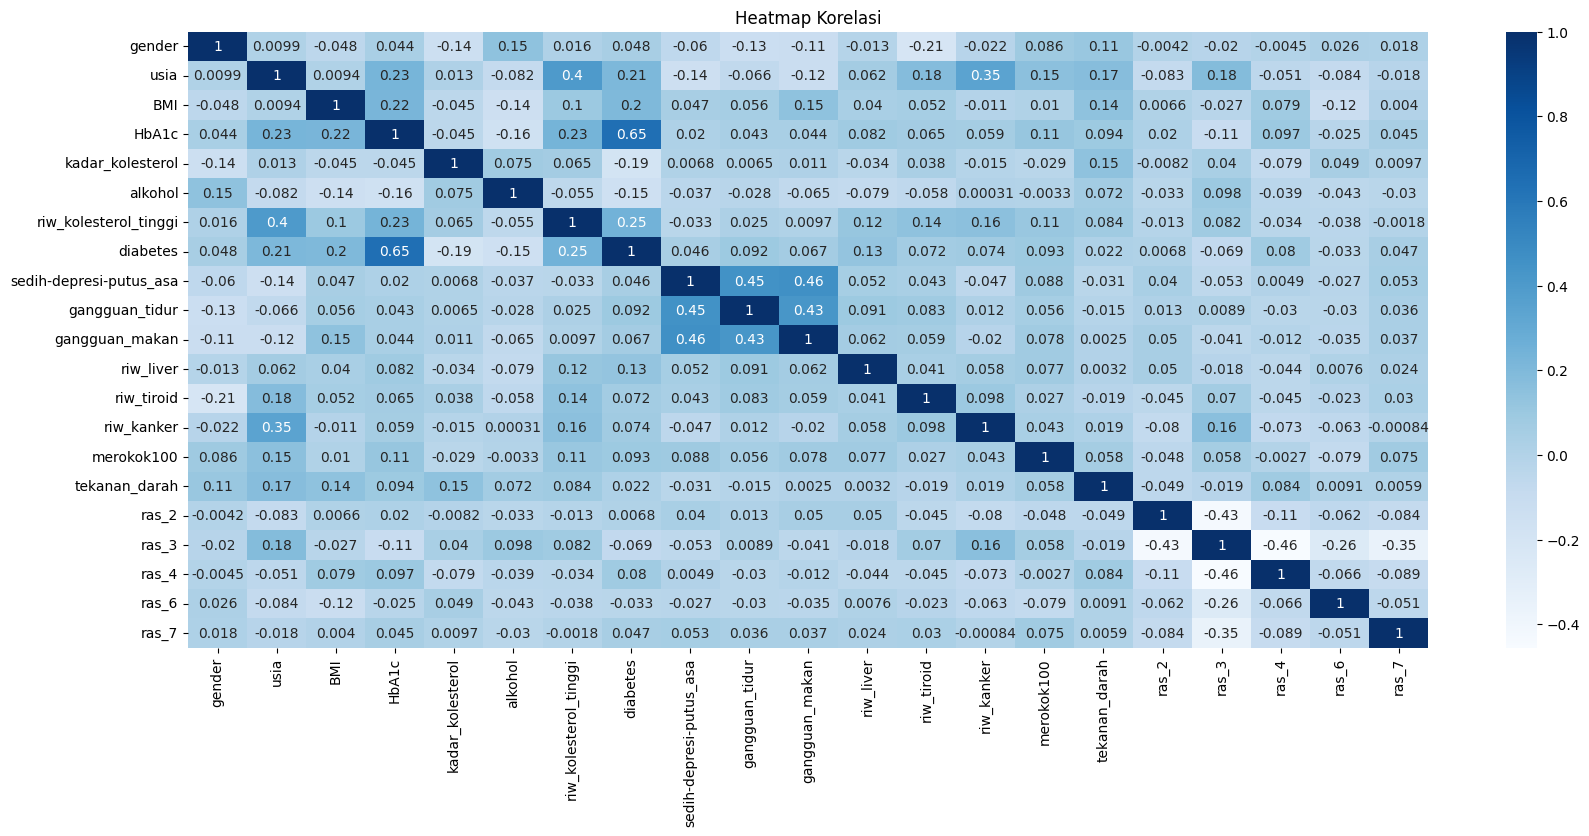

In [49]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Heatmap Korelasi')
plt.xticks(rotation=90)
plt.show()

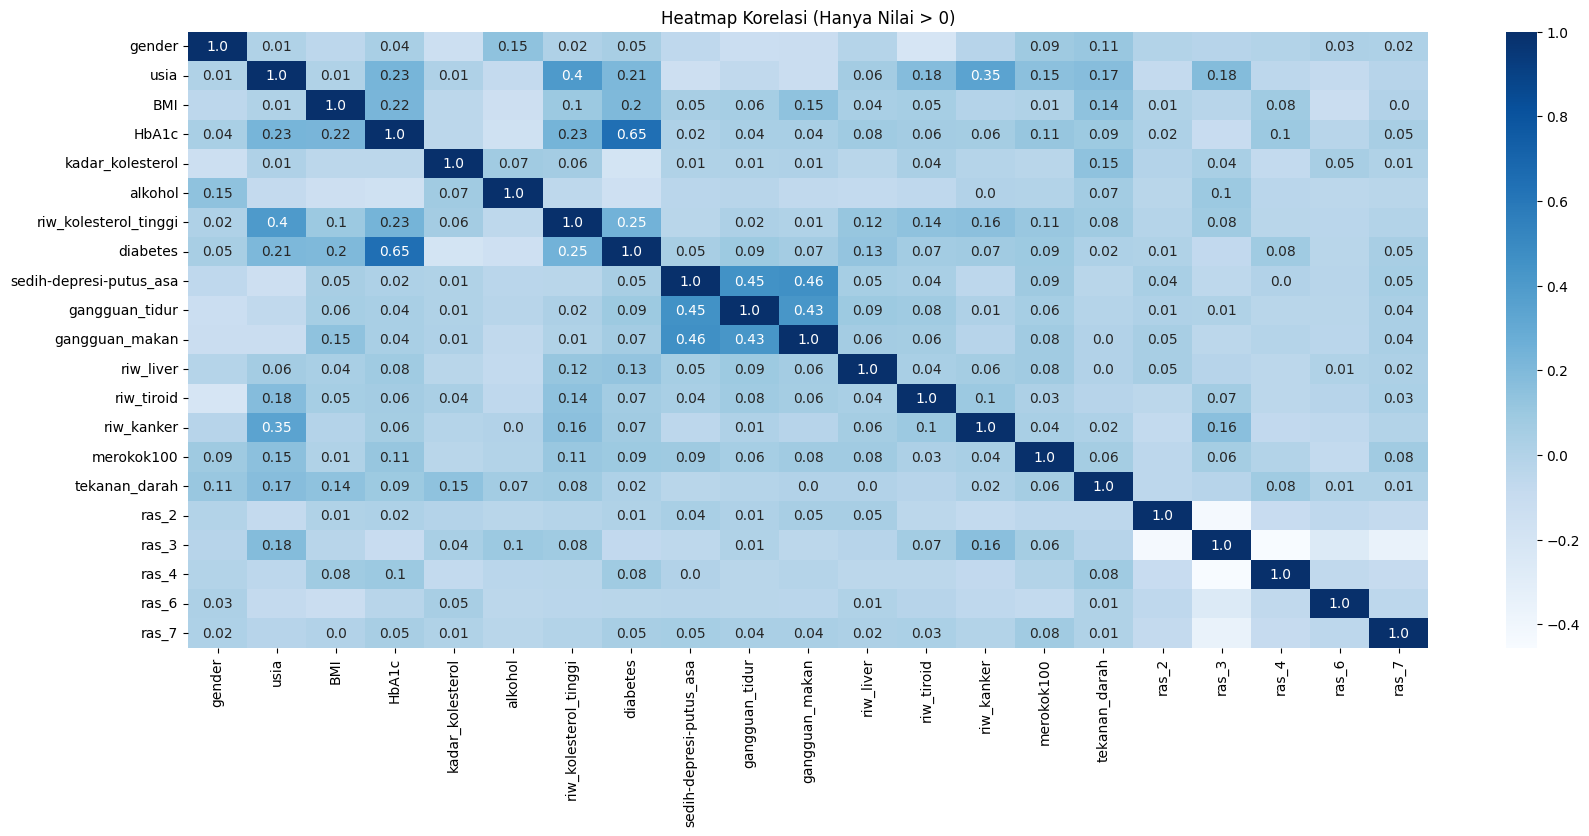

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 8))

# Hitung korelasi
corr = df.corr()

# Buat annot hanya untuk nilai > 0, lainnya kosong
annot = corr.where(corr > 0).round(2).astype(str)
annot[corr <= 0] = ''

sns.heatmap(corr, annot=annot, cmap='Blues', fmt='', cbar=True)
plt.title('Heatmap Korelasi (Hanya Nilai > 0)')
plt.xticks(rotation=90)
plt.show()

In [51]:
df['diabetes'].value_counts()

diabetes
0    3536
1     544
Name: count, dtype: int64

## 5. Splitting

In [52]:
X = df.drop(columns='diabetes', axis=1)
y = df['diabetes']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [54]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (2856, 20), X_test: (1224, 20), y_train: (2856,), y_test: (1224,)


## 6. Normalization

In [55]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Mengubah kembali numpy array menjadi dataframe
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## 7. Resampling

Undersampling

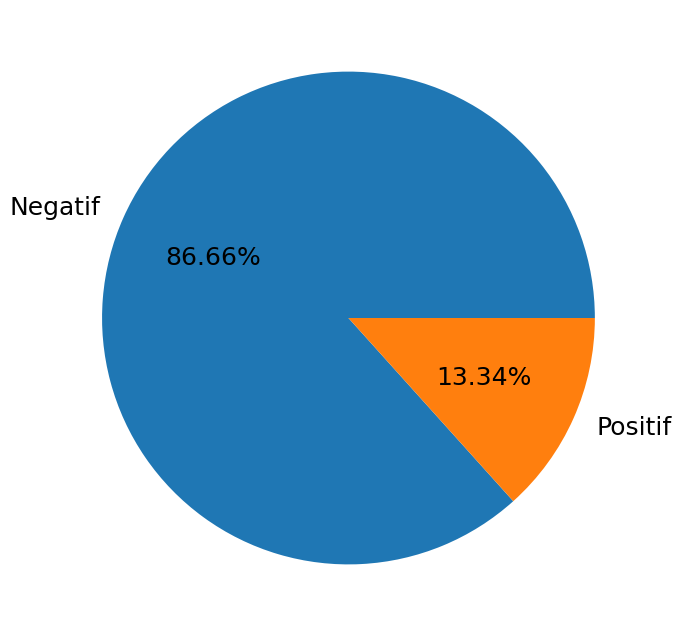

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
# plt.suptitle("Pie Chart", fontsize=14, fontweight='bold')
# sns.set(style="whitegrid")
plt.pie(x=y_train.value_counts(), labels=['Negatif', 'Positif'], autopct='%1.2f%%', textprops={'fontsize': 18, 'color': 'black'} )
# plt.tight_layout()
# plt.savefig('before_resampling.png')
plt.show()

In [58]:
from imblearn.combine import SMOTEENN
from collections import Counter

counter = Counter(y_train)
print('Sebelum SMOTE-ENN', counter)

SMOTEENN = SMOTEENN(random_state=42)
X_train, y_train = SMOTEENN.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('Setelah SMOTE-ENN', counter)

Sebelum SMOTE-ENN Counter({0: 2475, 1: 381})
Setelah SMOTE-ENN Counter({1: 2334, 0: 1783})


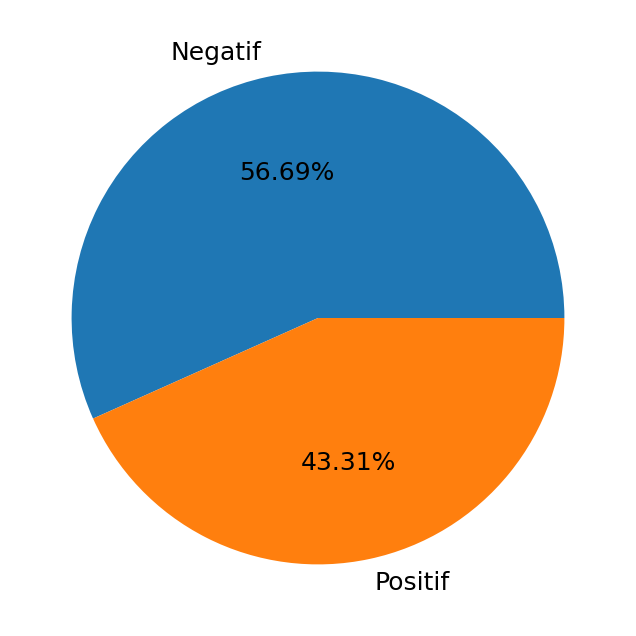

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
# plt.suptitle("Pie Chart", fontsize=14, fontweight='bold')
# sns.set(style="whitegrid")
plt.pie(x=y_train.value_counts(), labels=['Negatif', 'Positif'], autopct='%1.2f%%', textprops={'fontsize': 18, 'color': 'black'} )
# plt.tight_layout()
# plt.savefig('after_resampling.png')
plt.show()

In [60]:
class_weight = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

In [61]:
class_weight

np.float64(0.7639245929734362)

In [62]:
print(y_train.isnull().sum())
print(y_train.isin([np.inf, -np.inf]).sum())

0
0


# Modeling

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

## 1. KNN

In [64]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
model_knn_pred = model_knn.predict(X_test)

In [66]:
print("Akurasi KNN: ", accuracy_score(y_test, model_knn_pred))

Akurasi KNN:  0.7034313725490197


In [67]:
accuracy_knn = accuracy_score(y_test, model_knn_pred)
precision_knn = precision_score(y_test, model_knn_pred)
recall_knn = recall_score(y_test, model_knn_pred)
f1_knn = f1_score(y_test, model_knn_pred)
roc_auc_knn = roc_auc_score(y_test, model_knn_pred)

print(f"Accuracy: {accuracy_knn:.5f}")
print(f"Precision: {precision_knn:.5f}")
print(f"Recall: {recall_knn:.5f}")
print(f"F1-Score: {f1_knn:.5f}")

Accuracy: 0.70343
Precision: 0.26190
Recall: 0.67485
F1-Score: 0.37736


In [68]:
print("Classification Report KNN\n")
print(classification_report(y_test, model_knn_pred))

Classification Report KNN

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1061
           1       0.26      0.67      0.38       163

    accuracy                           0.70      1224
   macro avg       0.60      0.69      0.59      1224
weighted avg       0.84      0.70      0.75      1224



In [69]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_knn = model_knn.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
pr_auc_knn = average_precision_score(y_test, y_pred_proba_knn)
print(f"ROC-AUC Score: {roc_auc_knn:.4f}")
print(f"PR-AUC Score: {pr_auc_knn:.4f}")

ROC-AUC Score: 0.7284
PR-AUC Score: 0.2591


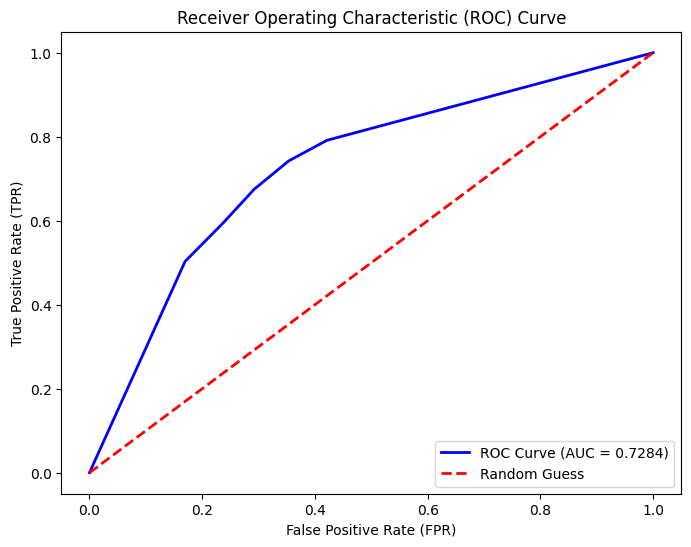

In [70]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 2. XGBoost

In [71]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
model_xgb_pred = model_xgb.predict(X_test)

In [73]:
print("Akurasi XGB: ", accuracy_score(y_test, model_xgb_pred))

Akurasi XGB:  0.9362745098039216


In [74]:
accuracy_xgb = accuracy_score(y_test, model_xgb_pred)
precision_xgb = precision_score(y_test, model_xgb_pred)
recall_xgb = recall_score(y_test, model_xgb_pred)
f1_xgb = f1_score(y_test, model_xgb_pred)
roc_auc_xgb = roc_auc_score(y_test, model_xgb_pred)

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.5f}")
print(f"F1-Score: {f1_xgb:.4f}")

Accuracy: 0.9363
Precision: 0.7179
Recall: 0.85890
F1-Score: 0.7821


In [75]:
print("Classification Report XGBoost\n")
print(classification_report(y_test, model_xgb_pred))

Classification Report XGBoost

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1061
           1       0.72      0.86      0.78       163

    accuracy                           0.94      1224
   macro avg       0.85      0.90      0.87      1224
weighted avg       0.94      0.94      0.94      1224



In [76]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
pr_auc_xgb = average_precision_score(y_test, y_pred_proba_xgb)
print(f"ROC-AUC Score: {roc_auc_xgb:.4f}")
print(f"PR-AUC Score: {pr_auc_xgb:.4f}")

ROC-AUC Score: 0.9565
PR-AUC Score: 0.8686


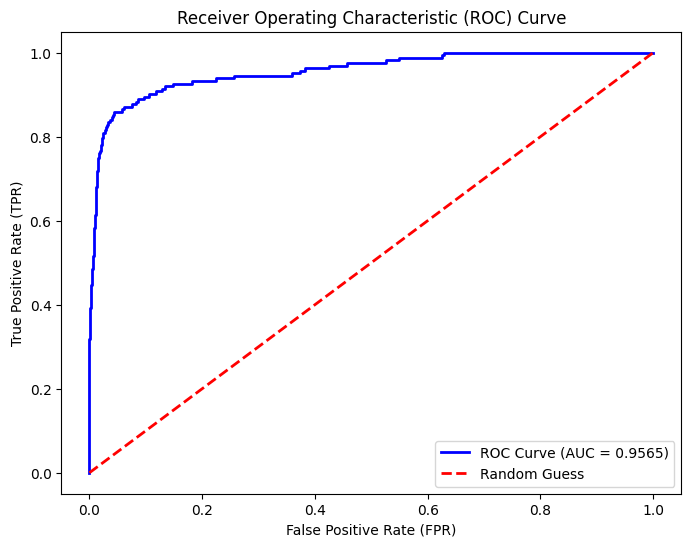

In [77]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 3. SVM

In [78]:
from sklearn.svm import SVC
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [79]:
model_svm_pred = model_svm.predict(X_test)

In [80]:
print("Akurasi SVM: ", accuracy_score(y_test, model_svm_pred))

Akurasi SVM:  0.8178104575163399


In [81]:
accuracy_svm = accuracy_score(y_test, model_svm_pred)
precision_svm = precision_score(y_test, model_svm_pred)
recall_svm = recall_score(y_test, model_svm_pred)
f1_svm = f1_score(y_test, model_svm_pred)
roc_auc_svm = roc_auc_score(y_test, model_svm_pred)

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

Accuracy: 0.8178
Recall: 0.8344
Precision: 0.4096
F1-Score: 0.5495


In [82]:
print("Akurasi SVM: ", accuracy_score(y_test, model_svm_pred))

Akurasi SVM:  0.8178104575163399


In [83]:
print("Classification Report SVM\n")
print(classification_report(y_test, model_svm_pred))

Classification Report SVM

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1061
           1       0.41      0.83      0.55       163

    accuracy                           0.82      1224
   macro avg       0.69      0.82      0.72      1224
weighted avg       0.90      0.82      0.84      1224



In [84]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_svm = model_svm.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
pr_auc_svm = average_precision_score(y_test, y_pred_proba_svm)
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")
print(f"PR-AUC Score: {pr_auc_svm:.4f}")

ROC-AUC Score: 0.9110
PR-AUC Score: 0.7134


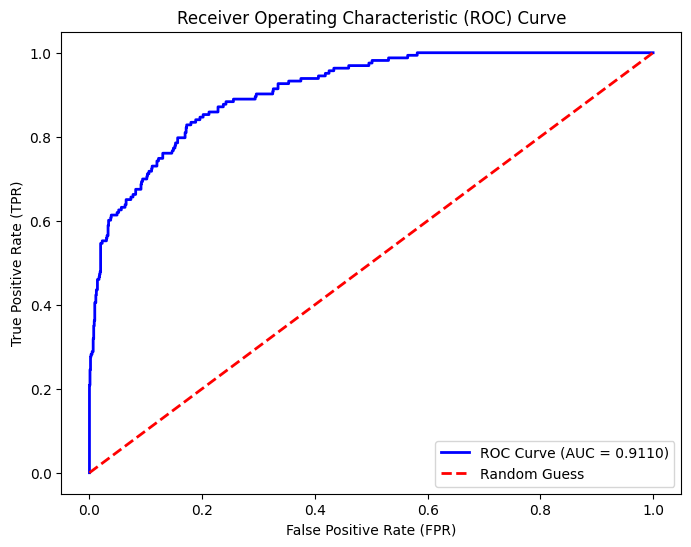

In [85]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 4. Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
model_rf_pred = model_rf.predict(X_test)

In [89]:
print("Akurasi RF: ", accuracy_score(y_test, model_rf_pred))

Akurasi RF:  0.928921568627451


In [90]:
accuracy_rf = accuracy_score(y_test, model_rf_pred)
precision_rf = precision_score(y_test, model_rf_pred)
recall_rf = recall_score(y_test, model_rf_pred)
f1_rf = f1_score(y_test, model_rf_pred)
roc_auc_rf = roc_auc_score(y_test, model_rf_pred)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Recall: {recall_rf:.5f}")
print(f"Precision: {precision_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Accuracy: 0.9289
Recall: 0.87117
Precision: 0.6827
F1-Score: 0.7655


In [91]:
print("Classification Report RF\n")
print(classification_report(y_test, model_rf_pred))

Classification Report RF

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1061
           1       0.68      0.87      0.77       163

    accuracy                           0.93      1224
   macro avg       0.83      0.90      0.86      1224
weighted avg       0.94      0.93      0.93      1224



In [92]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score: {roc_auc_rf:4f}")

ROC-AUC Score: 0.960311


In [93]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print(f"PR-AUC Score: {pr_auc_rf:.4f}")

ROC-AUC Score: 0.9603
PR-AUC Score: 0.8521


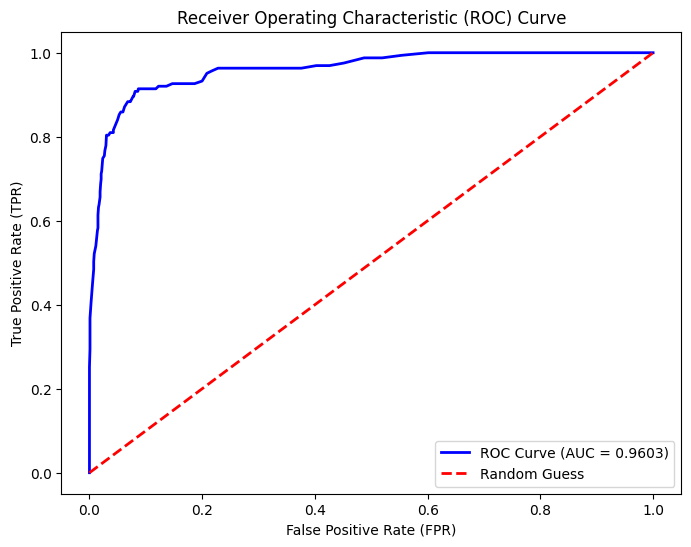

In [94]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 5. Hyperparameter

In [95]:
from sklearn.model_selection import StratifiedKFold
# Inisialisasi StratifiedKFold untuk cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV

### 5.1 KNN

In [96]:
hyp_knn_params = {
    'n_neighbors': [n for n in range(3, 20, 2)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # untuk 'minkowski'
}

In [97]:
from sklearn.model_selection import GridSearchCV
hyp_knn = KNeighborsClassifier()
clf_knn = GridSearchCV(
    estimator=hyp_knn,
    param_grid=hyp_knn_params,
    scoring='f1_weighted',
    cv=stratified_cv,
    verbose=1,
    n_jobs=-2
)

In [98]:
# hyp_knn = KNeighborsClassifier()
# clf_knn = RandomizedSearchCV(estimator=hyp_knn,
#                              param_distributions=hyp_knn_params,
#                              cv=stratified_cv,
#                              n_iter=100,
#                              n_jobs=-2,
#                              verbose=1)

In [99]:
clf_knn.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1_weighted', verbose=1)

In [100]:
best_comb_knn = clf_knn.best_params_
best_comb_knn

{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [101]:
clf_knn_pred = clf_knn.predict(X_test)
print("Akurasi HYPER KNN: ", accuracy_score(y_test, clf_knn_pred))

Akurasi HYPER KNN:  0.7589869281045751


In [102]:
accuracy_clf_knn = accuracy_score(y_test, clf_knn_pred)
precision_clf_knn = precision_score(y_test, clf_knn_pred)
recall_clf_knn = recall_score(y_test, clf_knn_pred)
f1_clf_knn = f1_score(y_test, clf_knn_pred)
roc_auc_clf_knn = roc_auc_score(y_test, clf_knn_pred)

print(f"Accuracy: {accuracy_clf_knn:.4f}")
print(f"Recall: {recall_clf_knn:.4f}")
print(f"Precision: {precision_clf_knn:.4f}")
print(f"F1-Score: {f1_clf_knn:.4f}")

Accuracy: 0.7590
Recall: 0.6380
Precision: 0.3059
F1-Score: 0.4135


In [103]:
clf_knn_pred = clf_knn.predict(X_test)
print("Akurasi HYPER KNN: ", accuracy_score(y_test, clf_knn_pred))

Akurasi HYPER KNN:  0.7589869281045751


In [104]:
print(classification_report(y_test, clf_knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1061
           1       0.31      0.64      0.41       163

    accuracy                           0.76      1224
   macro avg       0.62      0.71      0.63      1224
weighted avg       0.85      0.76      0.79      1224



In [105]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_clf_knn = clf_knn.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_clf_knn = roc_auc_score(y_test, y_pred_proba_clf_knn)
pr_auc_clf_knn = average_precision_score(y_test, y_pred_proba_clf_knn)
print(f"ROC-AUC Score: {roc_auc_clf_knn:.4f}")
print(f"PR-AUC Score: {pr_auc_clf_knn:.4f}")

ROC-AUC Score: 0.7299
PR-AUC Score: 0.2753


In [106]:
from sklearn.metrics import confusion_matrix
tn_clf_knn, fp_clf_knn, fn_clf_knn, tp_clf_knn = confusion_matrix(y_test, clf_knn_pred).ravel()

# Hitung spesifisitas
specificity_clf_knn = tn_clf_knn / (tn_clf_knn + fp_clf_knn)
sensitiviy_clf_knn = tp_clf_knn / (tp_clf_knn + fn_clf_knn)

In [107]:
print(f"True Negative (TN): {tn_clf_knn}")
print(f"False Positive (FP): {fp_clf_knn}")
print(f"Spesifisitas: {specificity_clf_knn:.4f}")

True Negative (TN): 825
False Positive (FP): 236
Spesifisitas: 0.7776


In [108]:
print(f"True Positive (TN): {tp_clf_knn}")
print(f"False Negative (FP): {fn_clf_knn}")
print(f"Sensitivitas: {sensitiviy_clf_knn:.4f}")

True Positive (TN): 104
False Negative (FP): 59
Sensitivitas: 0.6380


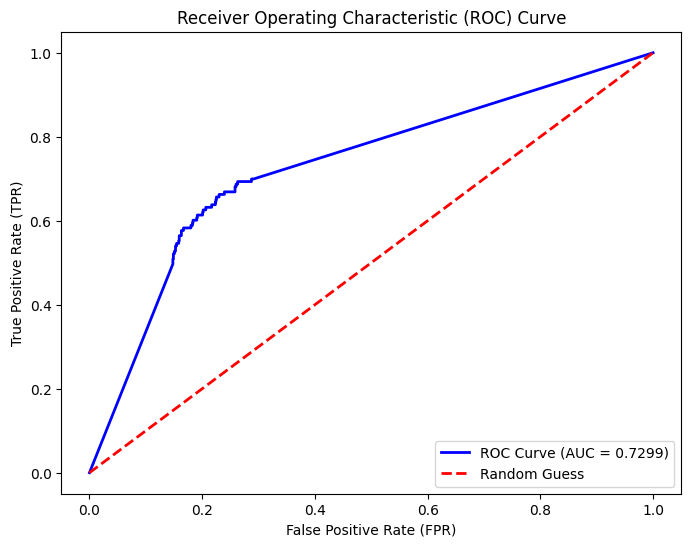

In [109]:
fpr_clf_knn, tpr_clf_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_clf_knn)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_clf_knn, tpr_clf_knn, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_clf_knn:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

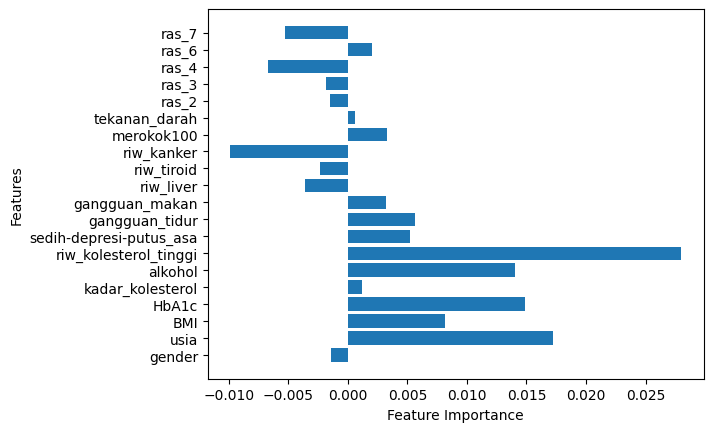

In [110]:
from sklearn.inspection import permutation_importance
result_knn = permutation_importance(clf_knn, X_test, y_test, n_repeats=10, random_state=42)
importance_knn = result_knn.importances_mean
#visualisasi
import matplotlib.pyplot as plt
plt.barh(X_train.columns, importance_knn)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

### 5.2 XGBoost

In [111]:
class_weight = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

In [112]:
hyp_xgb_params = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [113]:
from sklearn.model_selection import GridSearchCV
hyp_xgb = xgb.XGBClassifier()
clf_xgb = GridSearchCV(
    estimator=hyp_xgb,
    param_grid=hyp_xgb_params,
    scoring='f1_weighted',  # Fokus pada F1-score untuk dataset tidak seimbang
    cv=stratified_cv,
    verbose=1,
    n_jobs=-2
)

In [114]:
# hyp_xgb = xgb.XGBClassifier(random_state=42)
# clf_xgb = RandomizedSearchCV(estimator=hyp_xgb,
#                              param_distributions=hyp_xgb_params,
#                              cv=stratified_cv,
#                              n_iter=100,
#                              n_jobs=-2,
#                              verbose=1)

In [115]:
clf_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 2916 candidates, totalling 29160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_ty...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-2,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='f1_weighted', verbose=1)

In [116]:
best_comb_xgb = clf_xgb.best_params_
best_comb_xgb

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 400,
 'subsample': 0.7}

In [117]:
clf_xgb_pred = clf_xgb.predict(X_test)
print("Akurasi HYPER XGB: ", accuracy_score(y_test, clf_xgb_pred))

Akurasi HYPER XGB:  0.9362745098039216


In [118]:
accuracy_clf_xgb = accuracy_score(y_test, clf_xgb_pred)
precision_clf_xgb = precision_score(y_test, clf_xgb_pred)
recall_clf_xgb = recall_score(y_test, clf_xgb_pred)
f1_clf_xgb = f1_score(y_test, clf_xgb_pred)
roc_auc_clf_xgb = roc_auc_score(y_test, clf_xgb_pred)

print(f"Accuracy: {accuracy_clf_xgb:.4f}")
print(f"Recall: {recall_clf_xgb:.4f}")
print(f"Precision: {precision_clf_xgb:.4f}")
print(f"F1-Score: {f1_clf_xgb:.4f}")

Accuracy: 0.9363
Recall: 0.8589
Precision: 0.7179
F1-Score: 0.7821


In [119]:
print(classification_report(y_test, clf_xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1061
           1       0.72      0.86      0.78       163

    accuracy                           0.94      1224
   macro avg       0.85      0.90      0.87      1224
weighted avg       0.94      0.94      0.94      1224



In [120]:
clf_xgb.best_score_

np.float64(0.9769194899255689)

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_clf_xgb = clf_xgb.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_clf_xgb = roc_auc_score(y_test, y_pred_proba_clf_xgb)
pr_auc_clf_xgb = average_precision_score(y_test, y_pred_proba_clf_xgb)
print(f"ROC-AUC Score: {roc_auc_clf_xgb:.4f}")
print(f"PR-AUC Score: {pr_auc_clf_xgb:.4f}")

ROC-AUC Score: 0.9528
PR-AUC Score: 0.8429


In [122]:
from sklearn.metrics import confusion_matrix
tn_clf_xgb, fp_clf_xgb, fn_clf_xgb, tp_clf_xgb = confusion_matrix(y_test, clf_xgb_pred).ravel()

# Hitung spesifisitas
specificity_clf_xgb = tn_clf_xgb / (tn_clf_xgb + fp_clf_xgb)
sensitiviy_clf_xgb = tp_clf_xgb / (tp_clf_xgb + fn_clf_xgb)

In [123]:
print(f"True Negative (TN): {tn_clf_xgb}")
print(f"False Positive (FP): {fp_clf_xgb}")
print(f"Spesifisitas: {specificity_clf_xgb:.4f}")

True Negative (TN): 1006
False Positive (FP): 55
Spesifisitas: 0.9482


In [124]:
print(f"True Positive (TN): {tp_clf_xgb}")
print(f"False Negative (FP): {fn_clf_xgb}")
print(f"Sensitivitas: {sensitiviy_clf_xgb:.4f}")

True Positive (TN): 140
False Negative (FP): 23
Sensitivitas: 0.8589


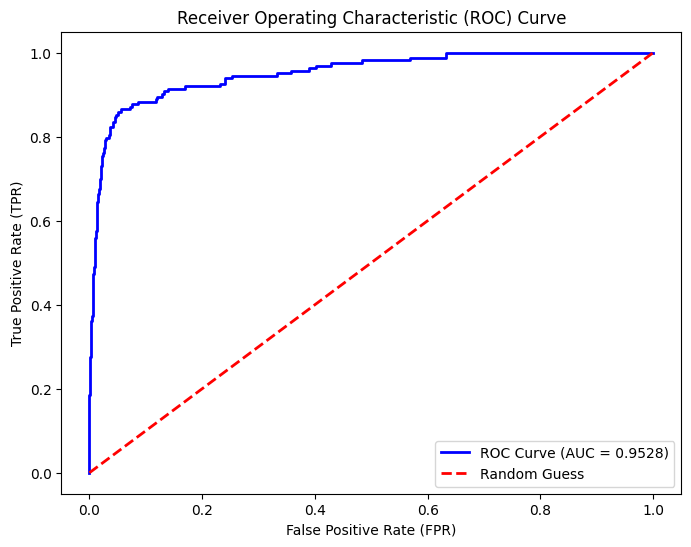

In [125]:
fpr_clf_xgb, tpr_clf_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_clf_xgb)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_clf_xgb, tpr_clf_xgb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_clf_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

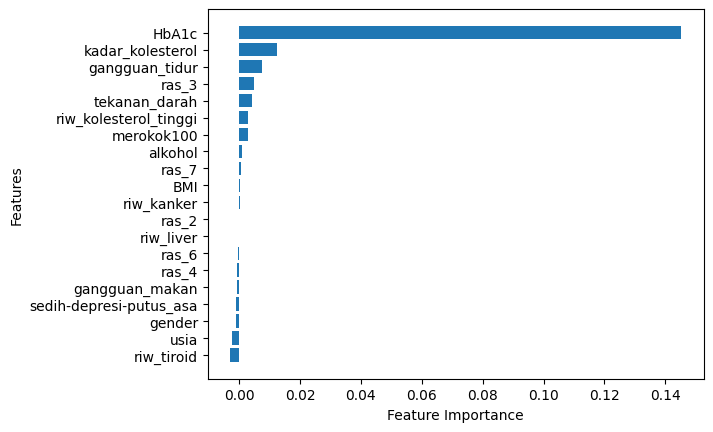

In [126]:
from sklearn.inspection import permutation_importance
result_xgb = permutation_importance(clf_xgb, X_test, y_test, n_repeats=10, random_state=42)
importance_xgb = result_xgb.importances_mean

sorted_idx_xgb = importance_xgb.argsort()[::1]
#visualisasi
import matplotlib.pyplot as plt
plt.barh(X_train.columns[sorted_idx_xgb], importance_xgb[sorted_idx_xgb])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

### 5.3 SVM

In [127]:
# hyp_svm_params = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'degree': [2, 3],
#     'coef0': [0.0, 0.5, 1.0]
# }

In [128]:
# svm_linear_params = {
#     'kernel': ['linear'],
#     'C': [0.01, 0.1, 1, 10, 100]
# }

# # kernel RBF
# svm_rbf_params = {
#     'kernel': ['rbf'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1]
# }

# # kernel polynomial
# svm_poly_params = {
#     'kernel': ['poly'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'degree': [2, 3],
#     'coef0': [0.0, 0.5, 1.0]
# }

# hyp_svm_params = [svm_linear_params, svm_rbf_params, svm_poly_params]

In [129]:
hyp_svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.01, 0.1],
    'degree': [2, 3]  # untuk kernel poly
}

In [130]:
# hyp_svm = SVC(probability=True)
# clf_svm = RandomizedSearchCV(estimator=hyp_svm,
#                              param_distributions=hyp_svm_params,
#                              cv=stratified_cv,
#                              n_iter=100,
#                              n_jobs=-2,
#                              verbose=1)

In [131]:
from sklearn.model_selection import GridSearchCV
hyp_svm = SVC(probability=True)
clf_svm = GridSearchCV(
    estimator=hyp_svm,
    param_grid=hyp_svm_params,
    scoring='f1_weighted',
    cv=stratified_cv,
    verbose=1,
    n_jobs=-2
)

In [132]:
clf_svm.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-2,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale', 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_weighted', verbose=1)

In [133]:
best_comb_svm = clf_svm.best_params_
best_comb_svm

{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [134]:
clf_svm_pred = clf_svm.predict(X_test)
print("Akurasi HYPER SVM: ", accuracy_score(y_test, clf_svm_pred))

Akurasi HYPER SVM:  0.8521241830065359


In [135]:
accuracy_clf_svm = accuracy_score(y_test, clf_svm_pred)
precision_clf_svm = precision_score(y_test, clf_svm_pred)
recall_clf_svm = recall_score(y_test, clf_svm_pred)
f1_clf_svm = f1_score(y_test, clf_svm_pred)
roc_auc_clf_svm = roc_auc_score(y_test, clf_svm_pred)

print(f"Accuracy: {accuracy_clf_svm:.4f}")
print(f"Recall: {recall_clf_svm:.4f}")
print(f"Precision: {precision_clf_svm:.4f}")
print(f"F1-Score: {f1_clf_svm:.4f}")

Accuracy: 0.8521
Recall: 0.6933
Precision: 0.4631
F1-Score: 0.5553


In [136]:
print(classification_report(y_test, clf_svm_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1061
           1       0.46      0.69      0.56       163

    accuracy                           0.85      1224
   macro avg       0.71      0.78      0.73      1224
weighted avg       0.88      0.85      0.86      1224



In [137]:
clf_svm.best_score_

np.float64(0.9834497543727293)

In [138]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_clf_svm = clf_svm.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_clf_svm = roc_auc_score(y_test, y_pred_proba_clf_svm)
pr_auc_clf_svm = average_precision_score(y_test, y_pred_proba_clf_svm)
print(f"ROC-AUC Score: {roc_auc_clf_svm:.4f}")
print(f"PR-AUC Score: {pr_auc_clf_svm:.4f}")

ROC-AUC Score: 0.8927
PR-AUC Score: 0.6762


In [139]:
from sklearn.metrics import confusion_matrix
tn_clf_svm, fp_clf_svm, fn_clf_svm, tp_clf_svm = confusion_matrix(y_test, clf_svm_pred).ravel()

# Hitung spesifisitas
specificity_clf_svm = tn_clf_svm / (tn_clf_svm + fp_clf_svm)
sensitiviy_clf_svm = tp_clf_svm / (tp_clf_svm + fn_clf_svm)

In [140]:
print(f"True Negative (TN): {tn_clf_svm}")
print(f"False Positive (FP): {fp_clf_svm}")
print(f"Spesifisitas: {specificity_clf_svm:.4f}")

True Negative (TN): 930
False Positive (FP): 131
Spesifisitas: 0.8765


In [141]:
print(f"True Positive (TN): {tp_clf_svm}")
print(f"False Negative (FP): {fn_clf_svm}")
print(f"Sensitivitas: {sensitiviy_clf_svm:.4f}")

True Positive (TN): 113
False Negative (FP): 50
Sensitivitas: 0.6933


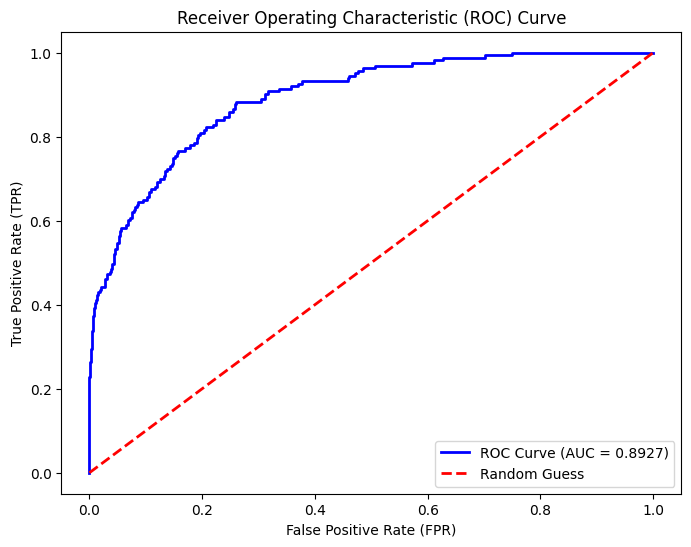

In [142]:
fpr_clf_svm, tpr_clf_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_clf_svm)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_clf_svm, tpr_clf_svm, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_clf_svm:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

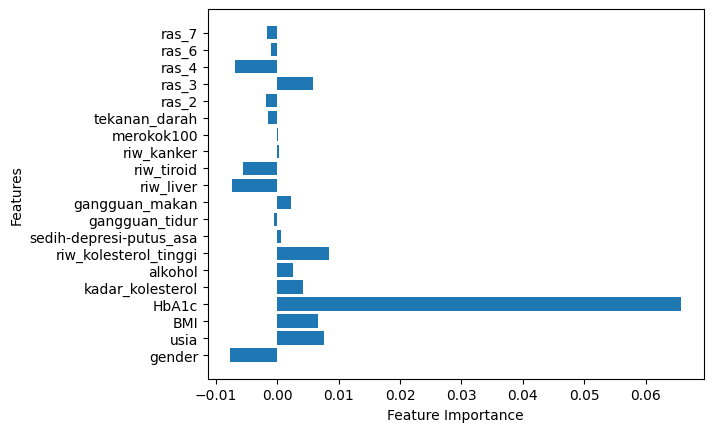

In [143]:
from sklearn.inspection import permutation_importance
result_svm = permutation_importance(clf_svm, X_test, y_test, n_repeats=10, random_state=42)
importance_svm= result_svm.importances_mean
#visualisasi
import matplotlib.pyplot as plt
plt.barh(X_train.columns, importance_svm)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

### 5.4 Random Forest

In [144]:
hyp_rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5],
}

In [145]:
# hyp_rf = RandomForestClassifier(random_state=42)
# clf_rf = RandomizedSearchCV(estimator=hyp_rf,
#                              param_distributions=hyp_rf_params,
#                              cv=stratified_cv,
#                              n_iter=100,
#                              n_jobs=-2,
#                              verbose=1)

In [146]:
from sklearn.model_selection import GridSearchCV
hyp_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_rf = GridSearchCV(
    estimator=hyp_rf,
    param_grid=hyp_rf_params,
    scoring='f1_weighted',
    cv=stratified_cv,
    verbose=1,
    n_jobs=-2
)

In [147]:
clf_rf.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-2,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='f1_weighted', verbose=1)

In [148]:
best_comb_rf = clf_rf.best_params_
best_comb_rf

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [149]:
clf_rf_pred = clf_rf.predict(X_test)
print("Akurasi HYPER Random Forest: ", accuracy_score(y_test, clf_rf_pred))

Akurasi HYPER Random Forest:  0.9330065359477124


In [150]:
accuracy_clf_rf = accuracy_score(y_test, clf_rf_pred)
precision_clf_rf = precision_score(y_test, clf_rf_pred)
recall_clf_rf = recall_score(y_test, clf_rf_pred)
f1_clf_rf = f1_score(y_test, clf_rf_pred)
roc_auc_clf_rf = roc_auc_score(y_test, clf_rf_pred)

print(f"Accuracy: {accuracy_clf_rf:.4f}")
print(f"Recall: {recall_clf_rf:.4f}")
print(f"Precision: {precision_clf_rf:.4f}")
print(f"F1-Score: {f1_clf_rf:.4f}")

Accuracy: 0.9330
Recall: 0.8773
Precision: 0.6976
F1-Score: 0.7772


In [151]:
print(classification_report(y_test, clf_rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1061
           1       0.70      0.88      0.78       163

    accuracy                           0.93      1224
   macro avg       0.84      0.91      0.87      1224
weighted avg       0.94      0.93      0.94      1224



In [152]:
clf_rf.best_score_

np.float64(0.9759229139790655)

In [153]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_clf_rf = clf_rf.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
roc_auc_clf_rf = roc_auc_score(y_test, y_pred_proba_clf_rf)
pr_auc_clf_rf = average_precision_score(y_test, y_pred_proba_clf_rf)
print(f"ROC-AUC Score: {roc_auc_clf_rf:.4f}")
print(f"PR-AUC Score: {pr_auc_clf_rf:.4f}")

ROC-AUC Score: 0.9599
PR-AUC Score: 0.8609


In [154]:
from sklearn.metrics import confusion_matrix
tn_clf_rf, fp_clf_rf, fn_clf_rf, tp_clf_rf = confusion_matrix(y_test, clf_rf_pred).ravel()

# Hitung spesifisitas
specificity_clf_rf = tn_clf_rf / (tn_clf_rf + fp_clf_rf)
sensitiviy_clf_rf = tp_clf_rf / (tp_clf_rf + fn_clf_rf)

In [155]:
print(f"True Negative (TN): {tn_clf_rf}")
print(f"False Positive (FP): {fp_clf_rf}")
print(f"Spesifisitas: {specificity_clf_rf:.4f}")

True Negative (TN): 999
False Positive (FP): 62
Spesifisitas: 0.9416


In [156]:
print(f"True Positive (TN): {tp_clf_rf}")
print(f"False Negative (FP): {fn_clf_rf}")
print(f"Sensitivitas: {sensitiviy_clf_rf:.4f}")

True Positive (TN): 143
False Negative (FP): 20
Sensitivitas: 0.8773


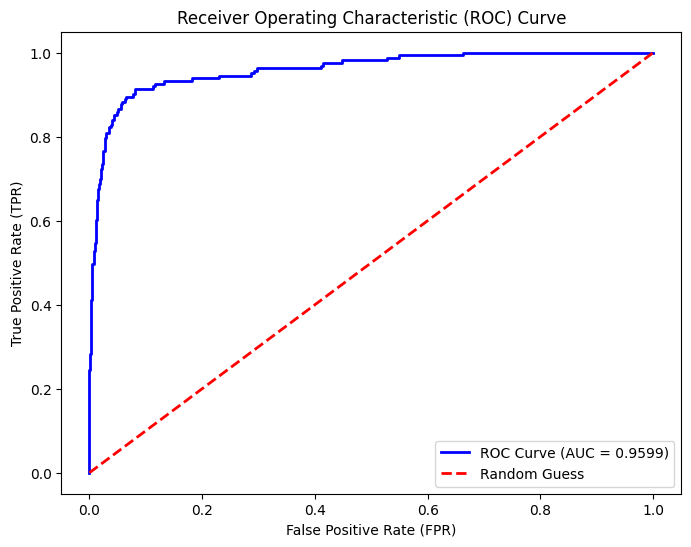

In [157]:
fpr_clf_rf, tpr_clf_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_clf_rf)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_clf_rf, tpr_clf_rf, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_clf_rf:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

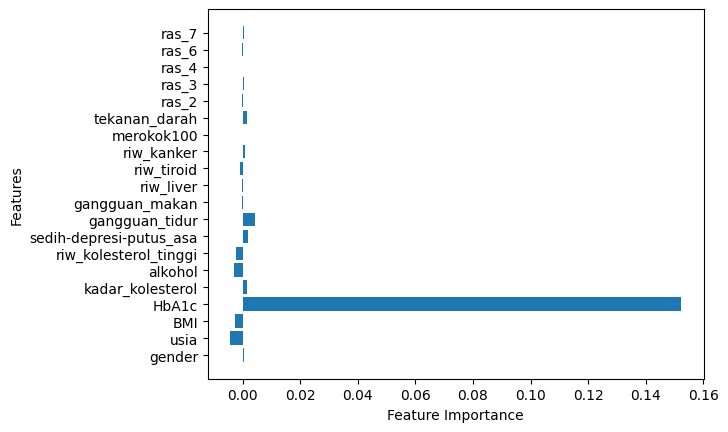

In [158]:
from sklearn.inspection import permutation_importance
result_rf = permutation_importance(clf_rf, X_test, y_test, n_repeats=10, random_state=42)
importance_rf = result_rf.importances_mean
#visualisasi
import matplotlib.pyplot as plt
plt.barh(X_train.columns, importance_rf)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

## 6. Feature Importance

In [189]:
from eli5.sklearn import PermutationImportance

### 6.1 KNN

In [190]:
# Untuk model KNN
perm_clf_knn = PermutationImportance(clf_knn, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm_clf_knn, feature_names=X_test.columns.tolist())

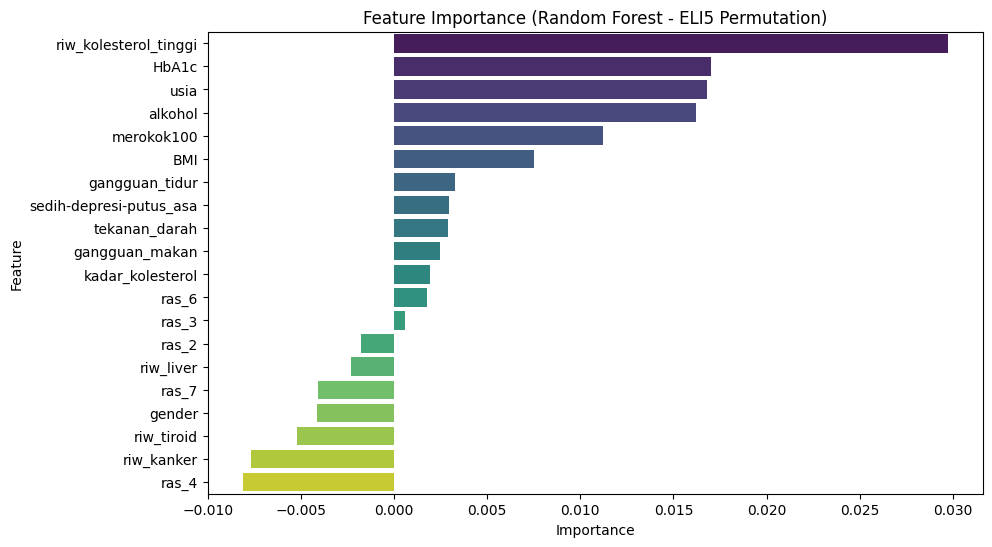

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

clf_knn_importance_values = perm_clf_knn.feature_importances_
feature_names = X_test.columns

clf_knn_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf_knn_importance_values})
clf_knn_importance_df = clf_knn_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=clf_knn_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest - ELI5 Permutation)')
# plt.tight_layout()
plt.show()

### 6.2 XGBoost

In [192]:
# Untuk model SVM
perm_clf_xgb = PermutationImportance(clf_xgb, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm_clf_svm, feature_names=X_test.columns.tolist())

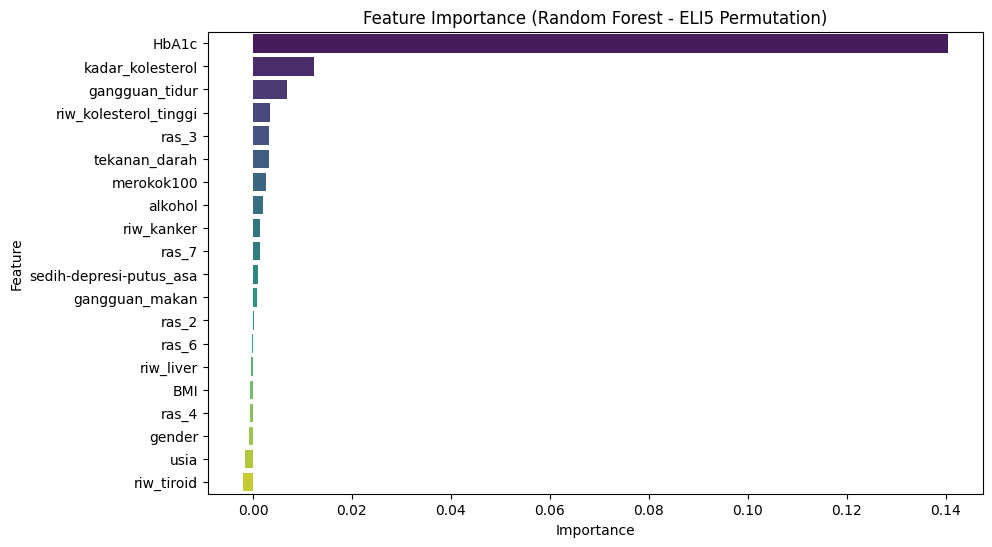

In [193]:
clf_xgb_importance_values = perm_clf_xgb.feature_importances_
feature_names = X_test.columns

clf_xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf_xgb_importance_values})
clf_xgb_importance_df = clf_xgb_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=clf_xgb_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest - ELI5 Permutation)')
# plt.tight_layout()
plt.show()

### 6.3 SVM

In [194]:
# Untuk model Random Forest
perm_clf_svm = PermutationImportance(clf_svm, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm_clf_svm, feature_names=X_test.columns.tolist())

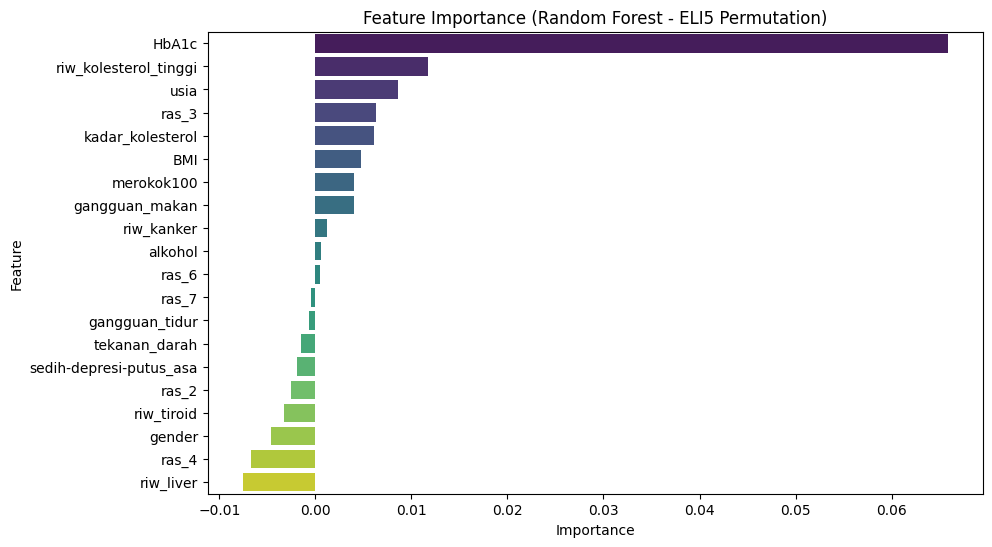

In [195]:
clf_svm_importance_values = perm_clf_svm.feature_importances_
feature_names = X_test.columns

clf_svm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf_svm_importance_values})
clf_svm_importance_df = clf_svm_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=clf_svm_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest - ELI5 Permutation)')
# plt.tight_layout()
plt.show()

### 6.4 Random Forest

In [196]:
# Untuk model XGBoost (pastikan input-nya sudah sesuai)
perm_clf_rf = PermutationImportance(clf_rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm_clf_rf, feature_names=X_test.columns.tolist())

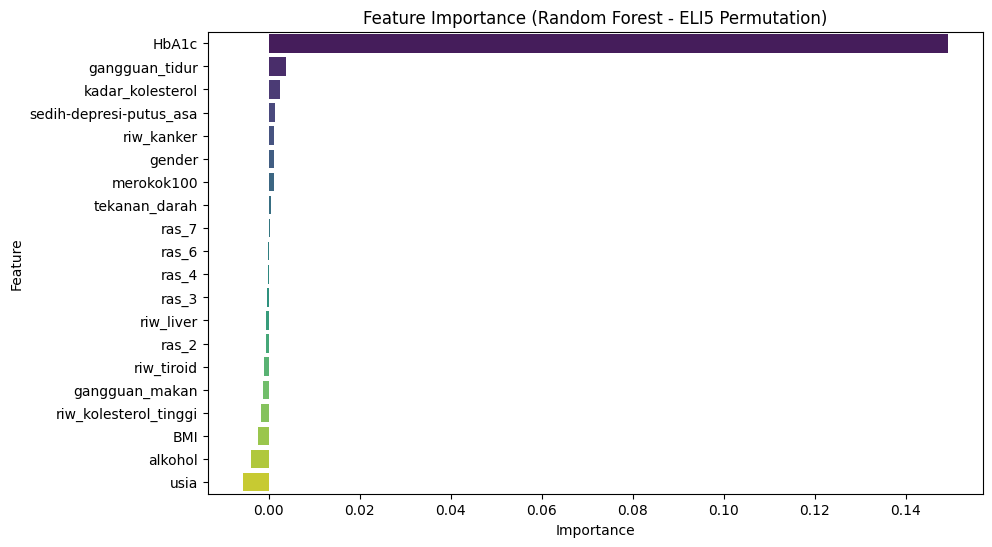

In [197]:
clf_rf_importance_values = perm_clf_rf.feature_importances_
feature_names = X_test.columns

clf_rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf_rf_importance_values})
clf_rf_importance_df = clf_rf_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=clf_rf_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest - ELI5 Permutation)')
# plt.tight_layout()
plt.show()